# LENDING CLUB CASE STUDY

#### Group Facilitator & Member Name:
> __Soumayadeep Manna__ 

### Problem Statement :

Lending Club is a consumer finance company which specializes in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

1.  If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

2.  If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

When a person applies for a loan, there are two types of decisions that could be taken by the company:
> __Loan accepted:__ If the company approves the loan, there are 3 possible scenarios described below:
>> 1.  __Fully paid:__ Applicant has fully paid the loan (the principal and the interest rate)
>> 2.  __Current:__ Applicant is in the process of paying the installments, i.e. the tenure of the loan is not yet completed. These candidates are not labeled as 'defaulted'.
>> 3.  __Charged-off:__ Applicant has not paid the installments in due time for a long period of time, i.e. he/she has defaulted on the loan.

> __Loan rejected:__ The company had rejected the loan (because the candidate does not meet their requirements etc.).

#### Business Objectives :
1.  Identity the risk of the loan applications
2.  Identify the driving factors or variables for the loan application.

#### Data to be analyzed :
Lending Club dataset provided which contains the complete loan data for all loans issued through the time period 2007 to 2011.

In [829]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## 1.  Data Sourcing

_We are sourcing the data for the Case Study from the dataset name __'loan.csv'__. The following file contains the complete loan data for all loans issued through the time period 2007 to 2011 for the users by the company._

In [830]:
#loading the dataset into a dataframe named as 'lendingclub'

lendingclub = pd.read_csv('loan.csv',header=0)

In [831]:
#displaying first 10 columns to understand the basics of the dataset

lendingclub.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [832]:
#dataframe.info() provides us with the very basics info of the dataset

lendingclub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


##### We can understand the followings from the above information : 
1.  Dataset contains total __'39717'__ entires
2.  Dataset contains __'111'__ number of columns
3.  Initially dataset contains three type of datatypes - __'float64'__, __'int64'__, and __'object'__

In [833]:
# dataframe.describe() provides the basic numerical analysis (count,mean,standard deviation,percentiles etc.) on the whole dataset
lendingclub.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,...,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,90.000000,9.000000,0.000000,8850.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,104.000000,12.000000,0.000000,17058.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,129.000000,44.000000,4.000000,149588.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


##### few of the understandings from the above result is as follows:
1. mean values of __'loan_amnt'__ columns is around _11219.443815_
2. max amount of __'installment__ column is around _1305.190000_

__Note:__ Out of 111 columns we can see only 85 columns here, because every columns is not numeric type. Also at initial stage dataset contains many <br> data quality issues, missing values etc. which can cause defective result in analysis. As part of Exploratory Data Analysis we will be performing <br>Data Cleaning operations on the next steps.

## 2.  Data Cleaning

As part of the preliminary process, from the overview of the dataset we can observe that many of the columns contains 'NaN' or 'Null' or No values at all. Such type of columns can not contribute any kind of valid result into the analysis and also if we consider suck column in the analysis it may effect the analysis result wrongly. 

-  As first step of data cleaning we will be removing such columns from the dataset which contains 'Nan', 'null' etc, at most.

In [834]:
# changing pandas max rows display value to 120 to see large row output results
pd.set_option('display.max_rows',120)

In [835]:
# displaying sum of null values of all the cloumns of the dataset
lendingclub.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


from the above result we can clearly observe that many columns of the dataset contains maximum of null values, those columns are of no use in our analysis.

> for better understanding lets found out the null values percentage for each of the columns in the data set

In [836]:
# calculating the percentage of null values for each column
missingval_by_percen = round(100*(lendingclub.isnull().sum()/len(lendingclub.index)),2)

In [837]:
# displaying the percentage of the columns which are greater than Zero 
missingval_by_percen[missingval_by_percen > 0]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

-  From the above data understanding perspective we can state that columns which have equal or more than 50% of values as null or missing are not going to actively impact the analysis.
> So in the next steps we will remove all the columns from the dataset which contains greater than equals 50% of null values

In [838]:
# storing all the columns with 50 or more percentage of missing values in a new variable
columns_with_50more_missval = missingval_by_percen[missingval_by_percen >= 50]

columns_with_50more_missval

mths_since_last_delinq             64.66
mths_since_last_record             92.99
next_pymnt_d                       97.13
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m                       100.00
open_rv_24m                       100.00
max_bal_bc                        100.00
all_util                          100.00
total_rev_hi_lim                  100.00
inq_fi                            100.00
total_cu_tl                       100.00
inq_last_12m                      100.00
acc_open_past_24

In [839]:
## based on the 'columns_with_50more_missval' indexes we are dropping the same columns from our master dataset
# also we need to type case the 'columns_with_50more_missval' to list for permorning the drop operation 
lendingclub = lendingclub.drop(list(columns_with_50more_missval.index),axis=1)

In [840]:
#checking the latest dimension of the dataset
lendingclub.shape

(39717, 54)

After dropping all the columns having 50 or more than 50 percentage of null values we can observe that now the dataset have only __54__ columns. Previously total number of columns was __111__, so we have dropped __57__ columns.

- Lets further check for null values percentage in each column in the updated data set

In [841]:
# calculating the percentage of null values for each column
missingval_by_percen = round(100*(lendingclub.isnull().sum()/len(lendingclub.index)),2)

# displaying the percentage of the columns which are greater than Zero 
missingval_by_percen[missingval_by_percen > 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

Observation showing that __'desc'__ column's percentage of null values is quite high and outlying among the 54 columns. So lets take a look at the __'desc'__ column content.

In [842]:
# displaying data of the 'desc' column
lendingclub.loc[:,'desc']

0          Borrower added on 12/22/11 > I need to upgra...
1          Borrower added on 12/22/11 > I plan to use t...
2                                                      NaN
3          Borrower added on 12/21/11 > to pay for prop...
4          Borrower added on 12/21/11 > I plan on combi...
                               ...                        
39712    Our current gutter system on our home is old a...
39713    The rate of interest and fees incurred by carr...
39714                                                  NaN
39715                                                  NaN
39716    I plan to consolidate over $7,000 of debt: a c...
Name: desc, Length: 39717, dtype: object

'desc' column basically contains with the users description about the reason or purpose of the loan. So column mainly consists of text data. Now in our case of analysis text columns are not going to be a major part, though text column can contribute in case of text or semantic analysis but in this scenario we can drop such column.

-  So, lets further look into the columns to find such kind of scenarios.

In [843]:
#displaying the existing columns
lendingclub.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

A dictionary file is also being provided with the dataset which elaborate the description of each columns. So going through the the data dictionary file for the above columns we find out that there are few columns which describes about the Customer's previous loan records and behaviours _(such as delinq_2yrs, total_rec_late_fee, collection_recovery_fee etc.)_, these records are generated after loan approvals, records of previous loans data. So we are filtering out such columns and marking those columns under __'previous_behaviour_variable'__.

In [844]:
previous_behaviour_variable =[
    'collection_recovery_fee',
    'delinq_2yrs',
    'earliest_cr_line',
    'last_credit_pull_d',
    'last_pymnt_amnt',
    'last_pymnt_d',
    'out_prncp',
    'recoveries',
    'revol_bal',
    'revol_util',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_int',
    'total_rec_late_fee',
    'total_rec_prncp',
    'out_prncp_inv'
]
previous_behaviour_variable

['collection_recovery_fee',
 'delinq_2yrs',
 'earliest_cr_line',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'out_prncp',
 'recoveries',
 'revol_bal',
 'revol_util',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'out_prncp_inv']

-  As part of this case study we are analysis the data records to help the lending club with the better decision makings for the approval of the loans when one user apply for it. 
> In these scenarios, above columns contains mainly data from the previous loans and describe the behaviours of the previous approved loans, amounts, recoveries etc.
> So, these column are not going to positively impact in the analysis of approval of loans decision making.

So we will drop these behavioural columns and the __'desc'__ column from the existing dataset.

In [845]:
# dropping 'desc' column from the dataset
lendingclub = lendingclub.drop('desc',axis=1)

In [846]:
# dropping behaviourals columns from the dataset
lendingclub = lendingclub.drop(previous_behaviour_variable,axis=1)

In [847]:
# current dimensions of the dataset
lendingclub.shape

(39717, 37)

After the previous cleaning operation we have now __38__ columns in the dataset.

In [848]:
#displaying remaining 38 columns
lendingclub.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'total_acc', 'initial_list_status',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

Lets further dive into the analysis of the dataset.In the next step lets find out the number of unique values per column.

In [849]:
# number of unique values per column
lendingclub.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
inq_last_6mths                    9
open_acc                         40
pub_rec                           5
total_acc                   

As we can see many column contains only one unique value, there is no variation or change in value. We are going to analysis few of those columns :

In [850]:
# displaying the contents of the columns 
print('Contents of column tax_liens: ',lendingclub.tax_liens.unique())
print('Contents of column delinq_amnt: ',lendingclub.delinq_amnt.unique())
print('Contents of column chargeoff_within_12_mths: ',lendingclub.chargeoff_within_12_mths.unique())
print('Contents of column acc_now_delinq: ',lendingclub.acc_now_delinq.unique())
print('Contents of column collections_12_mths_ex_med: ',lendingclub.collections_12_mths_ex_med.unique())

Contents of column tax_liens:  [ 0. nan]
Contents of column delinq_amnt:  [0]
Contents of column chargeoff_within_12_mths:  [ 0. nan]
Contents of column acc_now_delinq:  [0]
Contents of column collections_12_mths_ex_med:  [ 0. nan]


From the above results,'tax_liens' ,'delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','collections_12_mths_ex_med' though we can consider these factors for our analysis but these columns contains only 1 unique value and there is no variation in the values mostly Zero or NULL values.So these columns are not going to positively impact our analysis and we can drop these columns from the dataset.

-  Dataset also contains some demographic and descriptive columns such as,
> 1.  __title__ : The loan title provided by the borrower
> 2.  __url__ : URL for the LC page with listing data.
> 3.  __zip_code__ : The first 3 numbers of the zip code provided by the borrower in the loan application.



'title' and 'url' column is descriptive column which don't have any impact on the analysis, in the data state 'zip_code' column contains first 3 digit of zip codes encoded, which is not very relevant at the time of analysis and plotting. But we have one more demographic column __'addr-state'__ which will be impact full in case of analysis and plotting.

> So we will be dropping 'title', 'url', and 'zip_code' these 3 columns also from the dataset.

In [851]:
# displaying total different number of values present in application_type column
lendingclub.application_type.value_counts()

INDIVIDUAL    39717
Name: application_type, dtype: int64

__'application_type'__ column is a single valued column, which contains a unique single value 'INDIVIDUAL' throughout all the rows of record. So this column will not much effect in the variation of the analysis.

In [852]:
# displaying total different number of values present in initial_list_status column
lendingclub.initial_list_status.value_counts()

f    39717
Name: initial_list_status, dtype: int64

__'initial_list_status'__ column is a single valued column, which contains a unique single value 'f' throughout all the rows of record. So this column will not much effect in the variation of the analysis.

-  So we can drop __'initial_list_status'__ and __'application_type'__ these two columns from the dataset as well.

In [853]:
columns_to_be_dropped = [
    'tax_liens',
    'delinq_amnt',
    'chargeoff_within_12_mths',
    'acc_now_delinq',
    'collections_12_mths_ex_med',
    'title',
    'url',
    'zip_code',
    'application_type',
    'initial_list_status'
]

In [854]:
# dropping the columns and checking the dimension of the dataset

lendingclub = lendingclub.drop(columns_to_be_dropped,axis=1)
lendingclub.shape

(39717, 27)

In [855]:
lendingclub.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'dti',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'policy_code',
       'pub_rec_bankruptcies'],
      dtype='object')

In [856]:
pd.set_option('display.max_columns',30)
lendingclub.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,inq_last_6mths,open_acc,pub_rec,total_acc,policy_code,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,1,3,0,9,1,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,5,3,0,4,1,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,2,2,0,10,1,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,CA,20.00,1,10,0,37,1,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,OR,17.94,0,15,0,38,1,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,AZ,11.20,3,9,0,12,1,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,n,debt_consolidation,NC,23.51,1,7,0,11,1,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,n,car,CA,5.35,2,4,0,4,1,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,n,small_business,CA,5.55,2,11,0,13,1,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,n,other,TX,18.08,0,2,0,3,1,0.0


#### Data fixing and standardize values

In [857]:
lendingclub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   member_id             39717 non-null  int64  
 2   loan_amnt             39717 non-null  int64  
 3   funded_amnt           39717 non-null  int64  
 4   funded_amnt_inv       39717 non-null  float64
 5   term                  39717 non-null  object 
 6   int_rate              39717 non-null  object 
 7   installment           39717 non-null  float64
 8   grade                 39717 non-null  object 
 9   sub_grade             39717 non-null  object 
 10  emp_title             37258 non-null  object 
 11  emp_length            38642 non-null  object 
 12  home_ownership        39717 non-null  object 
 13  annual_inc            39717 non-null  float64
 14  verification_status   39717 non-null  object 
 15  issue_d            

As we can see __'int_rate'__ column i.e interest rate is a floating value but it is stored as object type in the dataset. As part of data analysis we need to convert the columns into proper datatypes. So lets look at the content of the __'int_rate'__ column.

In [858]:
# describing the int_rate column
lendingclub.int_rate.describe()

count      39717
unique       371
top       10.99%
freq         956
Name: int_rate, dtype: object

__'int_rate'__ values are consists of __'%'__ symbol that is why column can not be of float type. So lets remove all the special characters from the column values.

In [859]:
# eliminating '%' symbols from the int_rate column values
lendingclub['int_rate'] = lendingclub.int_rate.apply(lambda x: float(x.split("%")[0]))
lendingclub.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

__'term'__ is tenure of the loan in months so we can store the value of the term columns as integer values by removing the 'months' string from the present value.

In [860]:
# describing the term column
lendingclub.term.describe()

count          39717
unique             2
top        36 months
freq           29096
Name: term, dtype: object

In [861]:
# eliminating 'months' keyword from the term column values
lendingclub['term'] = lendingclub.term.apply(lambda x: int(x.split()[0]))
lendingclub.term.head()

0    36
1    60
2    36
3    36
4    60
Name: term, dtype: int64

In [862]:
# describing the emp_length column
lendingclub.emp_length.describe()

count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object

In [863]:
lendingclub.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

As per data dictionary provided __'emp_length'__ columns described as follows *'Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.'* So, to use the column data in a efficient way we can convert this object type values to integer values with the use of a data dictionary.

In [864]:
# creating dictionary to map the employment lengths
employment_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [865]:
# mapping emp_length values with dictionary
lendingclub = lendingclub.replace({'emp_length': employment_dict})
lendingclub.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,inq_last_6mths,open_acc,pub_rec,total_acc,policy_code,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,1,3,0,9,1,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0.0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,5,3,0,4,1,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,2,2,0,10,1,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,CA,20.00,1,10,0,37,1,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,Dec-11,Current,n,other,OR,17.94,0,15,0,38,1,0.0


In [866]:
lendingclub.emp_length.value_counts()

10.0    8879
0.0     4583
2.0     4388
3.0     4095
4.0     3436
5.0     3282
1.0     3240
6.0     2229
7.0     1773
8.0     1479
9.0     1258
Name: emp_length, dtype: int64

In [867]:
# checking for null values in dataset
lendingclub.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2459
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
purpose                    0
addr_state                 0
dti                        0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
total_acc                  0
policy_code                0
pub_rec_bankruptcies     697
dtype: int64

We can see from the above result that __'emp_title'__ and __'emp_length'__ columns still consists of respectively __'2459'__ and __'1075'__ null values. But as these two are key columns for our analysis we can not drop the entire column from the data set. Instead, we will remove only the rows of record that consists with null values for these two columns

In [868]:
# removing null valued rows from the dataset
lendingclub = lendingclub[~lendingclub.emp_title.isnull()]

In [869]:
# removing null valued rows from the dataset
lendingclub = lendingclub[~lendingclub.emp_length.isnull()]

Also, from the above we can see that __'pub_rec_bankruptcies'__ consists of __654__ null values, so lets look into the column data first,    

In [870]:
# values count for pub_rec_bankruptcies column
lendingclub.pub_rec_bankruptcies.value_counts()

0.0    35039
1.0     1502
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [871]:
lendingclub.shape

(37202, 27)

Current dataset have 37202 rows and for the __'pub_rec_bankruptcies'__ column total number of value __[0.0,1.0,2.0]__ count is 36548. So 654 rows of record is consists of null values.
> As per standardize we can replace those null values with zero (as zero is the majority of the value) present in the column.But number of null values is also high. 
> So in that case, replacing the null values with zero will impact our analysis and the result will be biased towards zero value

-  So we will be dropping the rows consists of null values for the following column.

In [872]:
# removing null valued rows from the dataset
lendingclub = lendingclub[~lendingclub.pub_rec_bankruptcies.isnull()]

In [873]:
lendingclub.shape

(36548, 27)

In [874]:
lendingclub.isnull().sum()

id                      0
member_id               0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
pymnt_plan              0
purpose                 0
addr_state              0
dti                     0
inq_last_6mths          0
open_acc                0
pub_rec                 0
total_acc               0
policy_code             0
pub_rec_bankruptcies    0
dtype: int64

__Now we have reduce the dataset to 36548 rows of data and 27 columns, and dataset contains zero null or nan values.__

In [875]:
#calculated description of the dataset
lendingclub.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,total_acc,policy_code,pub_rec_bankruptcies
count,3.654800e+04,3.654800e+04,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,3.654800e+04,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.0,36548.000000
mean,6.907171e+05,8.607228e+05,11294.866340,11020.644769,10586.433390,42.617270,12.081942,325.860813,5.011902,6.923504e+04,13.437434,0.865711,9.341934,0.053792,22.219957,1.0,0.041480
std,2.026869e+05,2.539809e+05,7435.395805,7168.173439,7073.216233,10.725175,3.735718,207.420129,3.542254,6.350343e+04,6.645522,1.063617,4.374767,0.235113,11.380562,0.0,0.200358
min,5.574200e+04,1.124930e+05,500.000000,500.000000,0.000000,36.000000,5.420000,16.080000,0.000000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,2.000000,1.0,0.000000
25%,5.224358e+05,6.752048e+05,5600.000000,5500.000000,5000.000000,36.000000,9.320000,168.730000,2.000000,4.189800e+04,8.350000,0.000000,6.000000,0.000000,14.000000,1.0,0.000000
50%,6.702785e+05,8.567205e+05,10000.000000,10000.000000,9175.000000,36.000000,11.860000,282.955000,4.000000,6.000000e+04,13.530000,1.000000,9.000000,0.000000,21.000000,1.0,0.000000
75%,8.397425e+05,1.049490e+06,15000.000000,15000.000000,14500.000000,60.000000,14.650000,431.682500,9.000000,8.300000e+04,18.690000,1.000000,12.000000,0.000000,29.000000,1.0,0.000000
max,1.077430e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,8.000000,44.000000,4.000000,90.000000,1.0,2.000000


As we can see few of the major numerical columns max value has significant difference with the mean and standard deviation values. So in that case it might happen the column data consists of outliers value (i.e. significantly large values outlying from the other values)

-  As part of data standardization will be analysis and treating the outliers values for few of those columns.

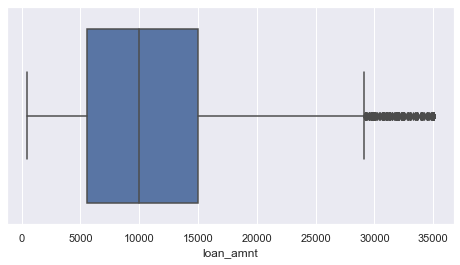

In [876]:
# box plotting loan_amnt column
sns.set(rc = {'figure.figsize':(8,4)})
sns.boxplot(lendingclub['loan_amnt'])
plt.show()

Above box plot shows the distribution of 'loan_amnt' values. Lets look at the quantile wise values of the same column

In [877]:
# displaying quantile specific values of the column
quantile_val_loan_amnt = lendingclub.loan_amnt.quantile([0.75,0.90,0.95,0.96,0.97,0.98,0.99])
quantile_val_loan_amnt

0.75    15000.0
0.90    22000.0
0.95    25000.0
0.96    25600.0
0.97    30000.0
0.98    31200.0
0.99    35000.0
Name: loan_amnt, dtype: float64

Quantile wise values look contiguous and there is not much outliers variation in the tail of the value.

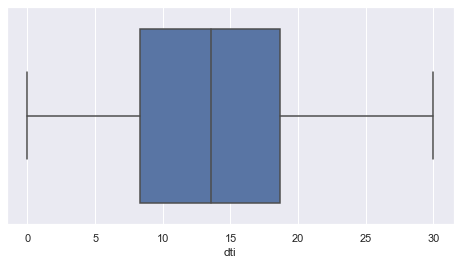

In [878]:
# box plotting dti column
sns.set(rc = {'figure.figsize':(8,4)})
sns.boxplot(lendingclub['dti'])
plt.show()

Above box plot shows the distribution of 'dti' values. Lets look at the quantile wise values of the same column

In [879]:
# displaying quantile specific values of the column
quantile_val_dti = lendingclub.dti.quantile([0.75,0.90,0.95,0.96,0.97,0.98,0.99])
quantile_val_dti

0.75    18.69
0.90    22.40
0.95    23.86
0.96    24.19
0.97    24.55
0.98    24.89
0.99    26.67
Name: dti, dtype: float64

Quantile wise values look contiguous and there is not much outliers variation in the tail of the value.

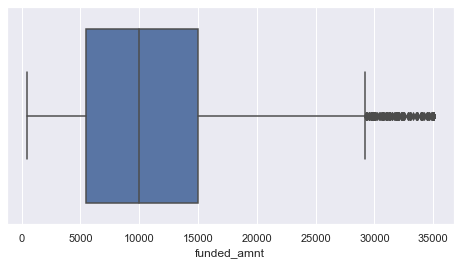

In [880]:
# box plotting funded_amnt column
sns.set(rc = {'figure.figsize':(8,4)})
sns.boxplot(lendingclub['funded_amnt'])
plt.show()

In [881]:
# displaying quantile specific values of the column
quantile_val_funded_amnt = lendingclub.funded_amnt.quantile([0.75,0.90,0.95,0.96,0.97,0.98,0.99])
quantile_val_funded_amnt

0.75    15000.0
0.90    21000.0
0.95    25000.0
0.96    25000.0
0.97    28000.0
0.98    30000.0
0.99    35000.0
Name: funded_amnt, dtype: float64

Quantile wise values look contiguous and there is not much outliers variation in the tail of the value.

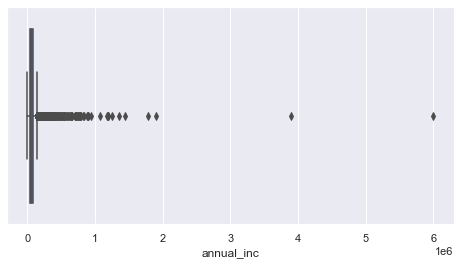

In [882]:
# box plotting annual_inc column
sns.set(rc = {'figure.figsize':(8,4)})
sns.boxplot(lendingclub['annual_inc'])
plt.show()

In [883]:
# displaying quantile specific values of the column
quantile_val_annual_inc = lendingclub.annual_inc.quantile([0.75,0.90,0.95,0.96,0.97,0.98,0.99])
quantile_val_annual_inc

0.75     83000.00
0.90    115000.00
0.95    140000.00
0.96    150000.00
0.97    162795.00
0.98    182527.12
0.99    230000.00
Name: annual_inc, dtype: float64

From the above observation we can conclude the followings:

1.  ___'loan_amnt'__,__'dti'__,__'funded_amnt'__ values of these three columns are consistently increasing as per the quantiles.There is not much gap or any outliers. So we can proceed with these 3 columns.
2.  __'annual_inc'__ boxplot shows that there are few outliers values present in the column. Also from the quantile data of the column we can see that after 96th percentile values are rapidly increased which considered as outliers.
3.  So, __'annual_inc'__ column data will be filtered out till 96th quantile.

In [884]:
# filtering annual_inc data until 96th quantile 
annual_inc_96_quantile = lendingclub.annual_inc.quantile(0.96)
lendingclub = lendingclub[lendingclub.annual_inc <= annual_inc_96_quantile]

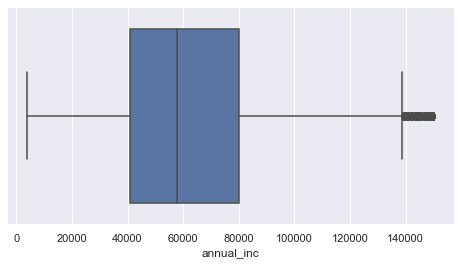

In [885]:
# box plotting annual_inc column
sns.set(rc = {'figure.figsize':(8,4)})
sns.boxplot(lendingclub['annual_inc'])
plt.show()

In [886]:
lendingclub.shape

(35175, 27)

__Now, 'annual_inc' boxplot looks more accurate after removing the outliers.__

#### Also we have completed data cleaning part. For the data analysis in the next step we will reload the dataset into a new csv file for the further usage purpose in further analysis.

In [887]:
# writing the cleaned dataset to new csv file
lendingclub.to_csv('master_lc.csv', encoding='utf-8', index=False)

## DATA ANALYSIS

Once dataset is cleaned and standardized, data analysis tasks needs to be performed in order to find the relevant information and outcomes from the following data. As part of data analysis there are various types of methodologies available. Like -

1. Univariate Analysis
2. Segmented Univariate Analysis
3. Bivariate Analysis
4. Derived Metrics

> So, as part of our analysis we will be using few of these analysis methodologies for the analysis of the lending club data.

In [888]:
# reading master csv in new dataframe
master_lc = pd.read_csv('master_lc.csv', encoding='utf-8')
master_lc.shape

(35175, 27)

### Univariate Analysis

*__As the term “univariate” suggests, this deals with analyzing variables one at a time. It is important to separately understand each variable before moving on to analyzing multiple variables together.__*


-  For 'loan_status' column we have three different values 'Fully paid', 'Current' and 'Charged-off' , where __'Current'__ status is for those customer whose loans are already approve and in the process of paying the installment.

-  So as per Case Study criteria we have to predict or analysis the possibilities of a Loan getting accepted. In this scenario 'Current' loan status is totally irrelevant values which can be excluded from the analysis.

In [889]:
# total values count of the column
master_lc.loan_status.value_counts()

Fully Paid     29289
Charged Off     4880
Current         1006
Name: loan_status, dtype: int64

In [890]:
#filtering only fully paid and charged-off

master_lc = master_lc[master_lc.loan_status != 'Current']
print(master_lc.shape)
print(master_lc.loan_status.value_counts())

(34169, 27)
Fully Paid     29289
Charged Off     4880
Name: loan_status, dtype: int64


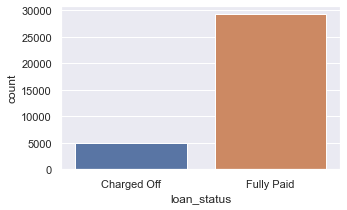

In [891]:
# barplotting loan status against total count
sns.set(rc = {'figure.figsize':(5,3)})
sns.countplot(x='loan_status', data = master_lc)
plt.show()

*Number of Fully paid loan count is much higher than the loans those are Charged Off*

In [892]:
# total values count of the column
master_lc.grade.value_counts()

B    10356
A     8894
C     6962
D     4514
E     2339
F      842
G      262
Name: grade, dtype: int64

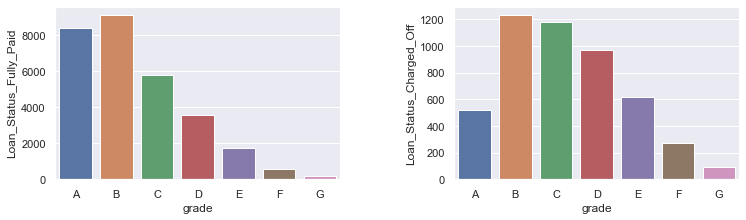

In [893]:
## bar plotting grades against the total count of data
# plot 1 ( Loan status Fully Paid) # plot 2 ( loan status Charged off)
plt.subplot(1,2,1)
sns.countplot(x='grade', data = master_lc[master_lc.loan_status == 'Fully Paid'], order=['A','B','C','D','E','F','G'])
plt.ylabel('Loan_Status_Fully_Paid')
plt.subplot(1,2,2)
sns.countplot(x='grade', data = master_lc[master_lc.loan_status == 'Charged Off'], order=['A','B','C','D','E','F','G'])
plt.ylabel('Loan_Status_Charged_Off')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

__*Grade B loans are the highest grade of loans in overall.Whereas in case of Charged Off Grade A loan is much lower then Fully Paid.*__

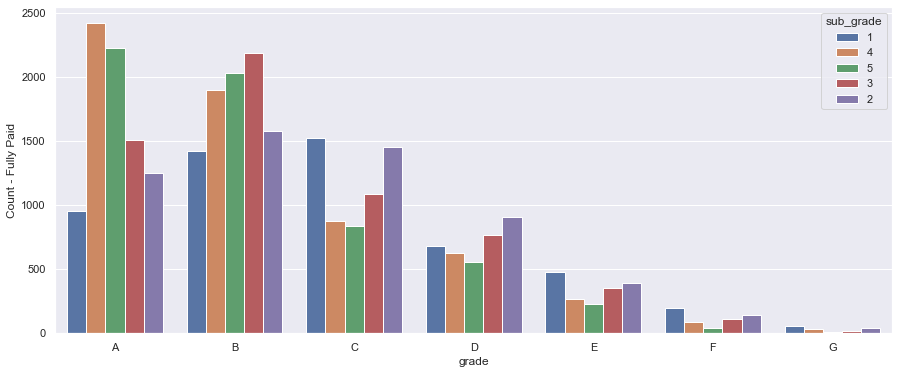

In [894]:
# filtering subgrade last digit
master_lc.sub_grade = master_lc.sub_grade.apply(lambda x: x[-1])

# bar plotting subgrade on grade basis of total count of loan status
sns.set(rc = {'figure.figsize':(15,6)})
sns.countplot(x='grade', data = master_lc[master_lc.loan_status == 'Fully Paid'],order=['A','B','C','D','E','F','G'],hue='sub_grade')
plt.ylabel('Count - Fully Paid')
# Where loan status is fully paid
plt.show()

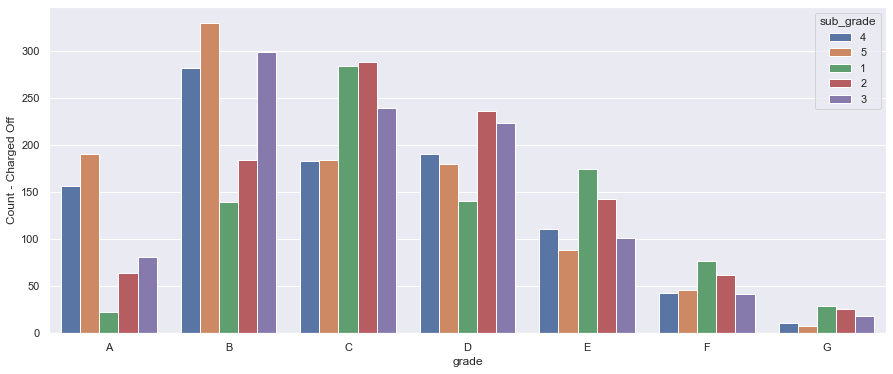

In [895]:
# bar plotting subgrade on grade basis of total count of loan status
sns.set(rc = {'figure.figsize':(15,6)})
sns.countplot(x='grade', data = master_lc[master_lc.loan_status == 'Charged Off'],order=['A','B','C','D','E','F','G'],hue='sub_grade')
plt.ylabel('Count - Charged Off')
# Where loan status is charged off
plt.show()

For Fully Paid loans sub_grades __A4,A5__ and __B5,B3__ are the highest overall, but for Charged Off loans sub_grades __B4,B5,B3__ and __C2,C1__ are the highest overall. 

From the problem statement we can state that the members who are Charged Off are the Defaulters of the loan, so to get the percentage of the defaulters and non-defaulters are are creating separate bin for __'loan_status'__ column.

>Fully Paid replaced as 0 <br>
>Charged Off replaces as 1

Based on this bin values we will be plotting variables to get idea about defaulting percentage.

In [896]:
# creating bin for loan_status
master_lc['loan_status_bin'] = master_lc.loan_status.apply(lambda x: int(0 if x == 'Fully Paid' else 1))

In [897]:
master_lc.loan_status_bin.value_counts()

0    29289
1     4880
Name: loan_status_bin, dtype: int64

In [898]:
# finding the mean average value of the loan_status bin 
np.mean(master_lc.loan_status_bin)

0.14281951476484533

__Observation 1:__ The above result states that the average percentage of defaulting is around __14%__.

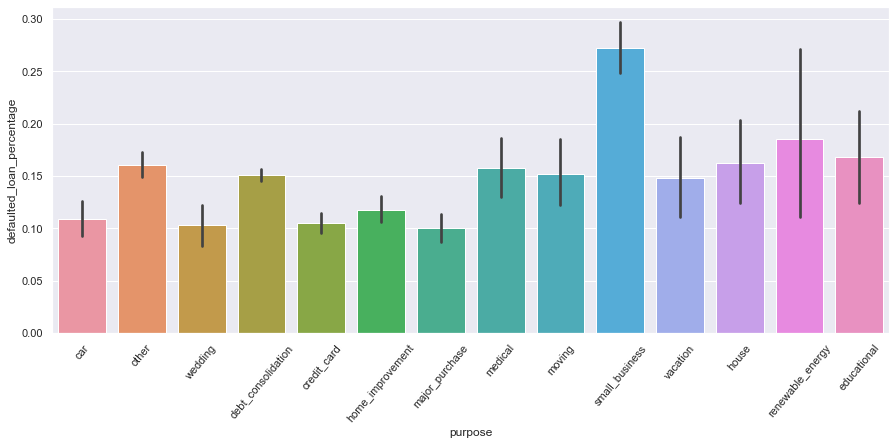

In [899]:
# plot purpose vs loan_defaulting_percentage
sns.barplot(x='purpose', y='loan_status_bin', data=master_lc)
plt.xticks(rotation=50)
plt.ylabel('defaulted_loan_percentage')
plt.show()

__Observation 2:__ __*Small business loans default the most, then renewable energy and education*__


In [900]:
# finding unique values of home ownership
master_lc.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

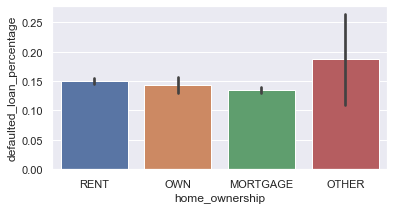

In [901]:
# plot home-ownership vs loan_defaulting_percentage
sns.set(rc = {'figure.figsize':(6,3)})
sns.barplot(x='home_ownership', y='loan_status_bin', data=master_lc)
plt.ylabel('defaulted_loan_percentage')
plt.show()

__Observation 3:__ Home ownership is not much effective as defaulting rate is almost avg for all the categories.

In [902]:
master_lc.term.unique()

array([60, 36], dtype=int64)

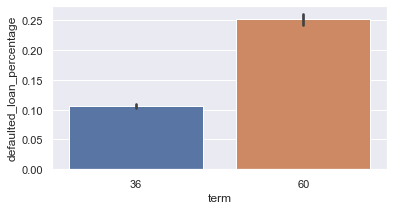

In [903]:
# plot term vs loan_defaulting_percentage
sns.set(rc = {'figure.figsize':(6,3)})
sns.barplot(x='term', y='loan_status_bin', data=master_lc)
plt.ylabel('defaulted_loan_percentage')
plt.show()

__Observation 4:__ __60 months loans have the higher rate of defaulting__

In [904]:
master_lc.verification_status.unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

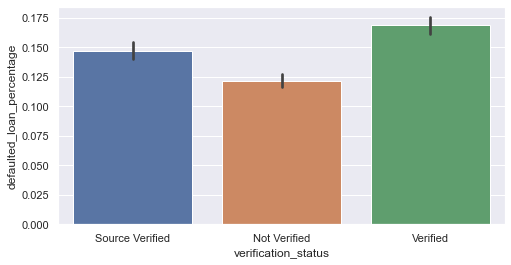

In [905]:
# plot verification_source vs loan_defaulting_percentage
sns.set(rc = {'figure.figsize':(8,4)})
sns.barplot(x='verification_status', y='loan_status_bin', data=master_lc)
plt.ylabel('defaulted_loan_percentage')
plt.show()

__Observation 5:__ Verified members have the slightly high rate of defaulting than the Source Verified members.

In [906]:
master_lc.emp_length.unique()

array([ 0., 10.,  3.,  8.,  9.,  5.,  4.,  1.,  6.,  2.,  7.])

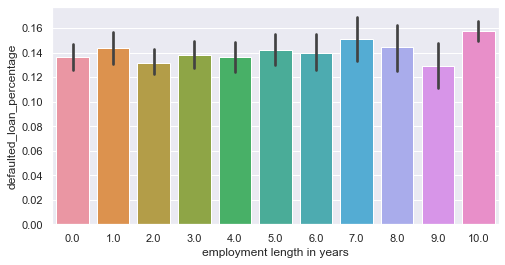

In [907]:
# plot verification_source vs loan_defaulting_percentage
sns.set(rc = {'figure.figsize':(8,4)})
sns.barplot(x='emp_length', y='loan_status_bin', data=master_lc)
plt.xlabel('employment length in years')
plt.ylabel('defaulted_loan_percentage')
plt.show()

__Observation 6:__ employment length is not a distinguishable column for the analysis.

For few of these columns we are converting them into categorical values by creating different interval of bins and replacing the values with the bins.

In [908]:
# emp_length to categorical value
def binning_emp_length(x):
    if x < 1:
        return 'fresher'
    if x >= 1 and x < 2:
        return 'junior'
    if x >=2 and x < 4:
        return 'mid-senior'
    if x>=4 and x<9 :
        return 'senior'
    else:
        return 'expert'

master_lc['emp_length_bin'] = master_lc.emp_length.apply(lambda x: binning_emp_length(x))

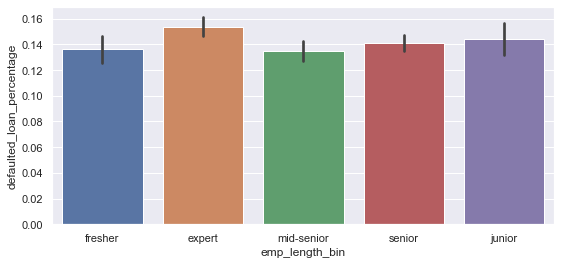

In [909]:
sns.set(rc = {'figure.figsize':(9,4)})
sns.barplot(x='emp_length_bin', y='loan_status_bin', data=master_lc)
plt.ylabel('defaulted_loan_percentage')
plt.show()

__Observation 7:__ expert category employees have slightly high default rate but still different is not very much discriminating.

<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

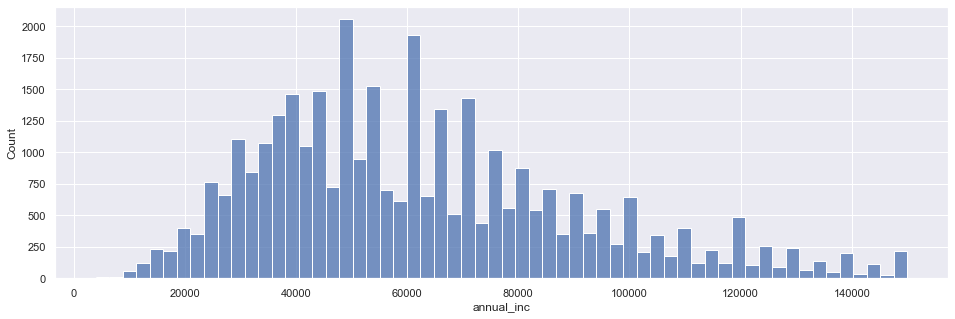

In [962]:
# histogram distribution of annual income 
sns.histplot(data=master_lc,x='annual_inc')

__Observation 8:__ Majority of the annual income is in the range of 50-60 thousand.

In [911]:
master_lc.issue_d.head()

0    Dec-11
1    Dec-11
3    Dec-11
4    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [912]:
# converting iise_d column to datetime format
master_lc.issue_d = master_lc.issue_d.apply(lambda x: datetime.strptime(x, '%b-%y'))

In [913]:
# extracting year and month from the issue_d column
master_lc['issue_year'] = master_lc.issue_d.apply(lambda x: x.year)
master_lc['issue_month']= master_lc.issue_d.apply(lambda x: x.month)
master_lc.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,loan_status,pymnt_plan,purpose,addr_state,dti,inq_last_6mths,open_acc,pub_rec,total_acc,policy_code,pub_rec_bankruptcies,loan_status_bin,emp_length_bin,issue_year,issue_month
0,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,4,Ryder,0.0,RENT,30000.0,Source Verified,...,Charged Off,n,car,GA,1.00,5,3,0,4,1,0.0,1,fresher,2011,12
1,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,...,Fully Paid,n,other,CA,20.00,1,10,0,37,1,0.0,0,expert,2011,12
3,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,4,Veolia Transportaton,3.0,RENT,36000.0,Source Verified,...,Fully Paid,n,wedding,AZ,11.20,3,9,0,12,1,0.0,0,mid-senior,2011,12
4,1069639,1304742,7000,7000,7000.0,60,15.96,170.08,C,5,Southern Star Photography,8.0,RENT,47004.0,Not Verified,...,Fully Paid,n,debt_consolidation,NC,23.51,1,7,0,11,1,0.0,0,senior,2011,12
5,1072053,1288686,3000,3000,3000.0,36,18.64,109.43,E,1,MKC Accounting,9.0,RENT,48000.0,Source Verified,...,Fully Paid,n,car,CA,5.35,2,4,0,4,1,0.0,0,expert,2011,12


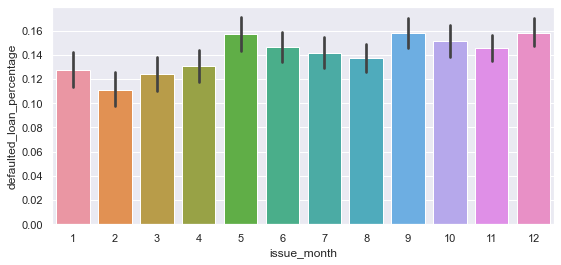

In [914]:
# plot issue month vs loan_defaulting_percentage
sns.set(rc = {'figure.figsize':(9,4)})
sns.barplot(x='issue_month', y='loan_status_bin', data=master_lc)
plt.ylabel('defaulted_loan_percentage')
plt.show()

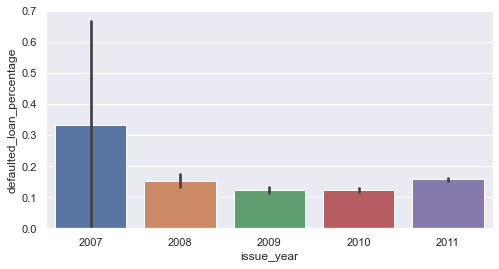

In [915]:
# plot issue_year vs loan_defaulting_percentage
sns.set(rc = {'figure.figsize':(8,4)})
sns.barplot(x='issue_year', y='loan_status_bin', data=master_lc)
plt.ylabel('defaulted_loan_percentage')
plt.show()

__Observation 9:__ Year 2007 have the high rate of defaulting, where as months doesn't give any proper visualization,

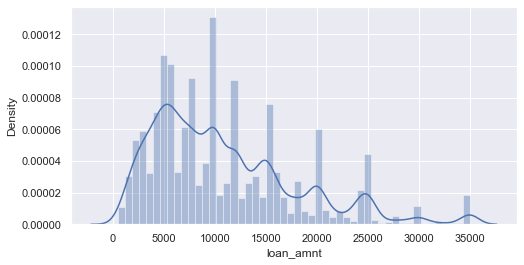

In [916]:
#distribution plot of loan amount
sns.set(rc = {'figure.figsize':(8,4)})
sns.distplot(master_lc.loan_amnt)
plt.show()

__Observation 10:__ Loan amount highly distributed around 10000.

In [917]:
# method to create bin
def binning_investment_amnt(x):
    if x <= 5000:
        return 'low'
    if x > 5000 and x <= 15000:
        return 'moderate'
    if x > 15000 and x <= 25000:
        return 'high'
    else:
        return 'very high'


In [918]:
# binning loan amount
master_lc['loan_amnt_bin'] = master_lc.loan_amnt.apply(lambda x: binning_investment_amnt((x)))
#binning invested amount
master_lc['funded_amnt_inv_bin'] = master_lc.funded_amnt_inv.apply(lambda x: binning_investment_amnt((x)))
# binning funded amount
master_lc['funded_amnt_bin'] = master_lc.funded_amnt.apply(lambda x: binning_investment_amnt(x))

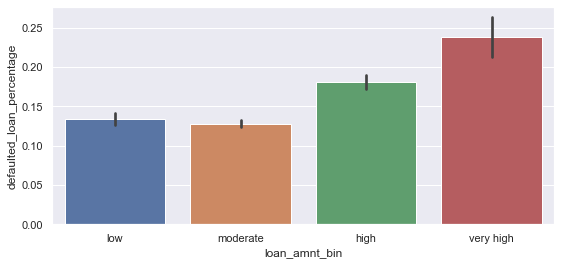

In [919]:
# plotting loan amount bin
sns.set(rc = {'figure.figsize':(9,4)})
sns.barplot(x='loan_amnt_bin', y='loan_status_bin', data=master_lc)
plt.ylabel('defaulted_loan_percentage')
plt.show()

__Observation 11: Default rate increases as loan amount increase.__

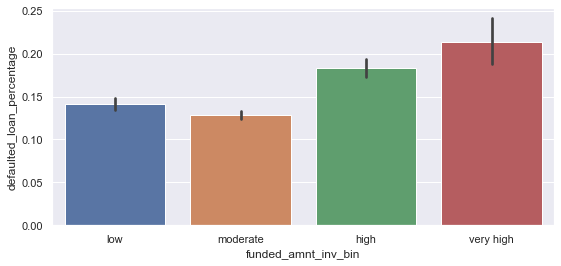

In [920]:
# plotting invested amount bin
sns.set(rc = {'figure.figsize':(9,4)})
sns.barplot(x='funded_amnt_inv_bin', y='loan_status_bin', data=master_lc)
plt.ylabel('defaulted_loan_percentage')
plt.show()

__Observation 12: Default rate high for very high invested amounts.__

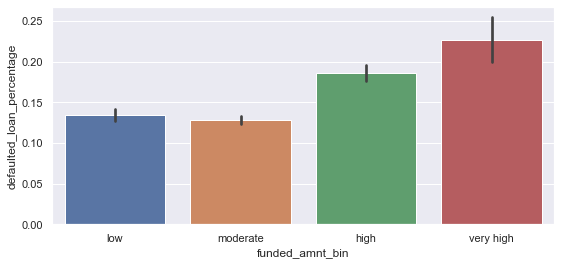

In [921]:
# plotting funded amount bin
sns.set(rc = {'figure.figsize':(9,4)})
sns.barplot(x='funded_amnt_bin', y='loan_status_bin', data=master_lc)
plt.ylabel('defaulted_loan_percentage')
plt.show()

__Observation 13: Default rate high for very high approved/funded amounts.__

In [922]:
# method to create bin
def binning_interest(x):
    if x < 6:
        return 'low'
    if x >= 6 and x < 9:
        return 'moderate'
    if x >= 9 and x < 14:
        return 'high'
    else:
        return 'very high'

master_lc['int_rate_bin'] = master_lc.int_rate.apply(lambda x: binning_interest((x)))

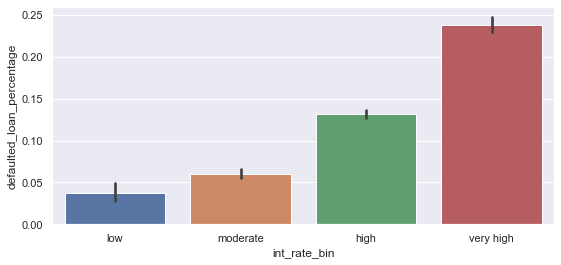

In [923]:
# plotting interest rate bin
sns.set(rc = {'figure.figsize':(9,4)})
sns.barplot(x='int_rate_bin', y='loan_status_bin', data=master_lc, order = ['low','moderate','high','very high'])
plt.ylabel('defaulted_loan_percentage')
plt.show()

__Observation 14: Default rate increases as interest rate increase.__

In [924]:
# method to create bin
def binning_dti(x):
    if x <= 10:
        return 'low'
    elif x > 10 and x <=20:
        return 'moderate'
    else:
        return 'high'

master_lc['dti_bin'] = master_lc.dti.apply(lambda x: binning_dti((x)))

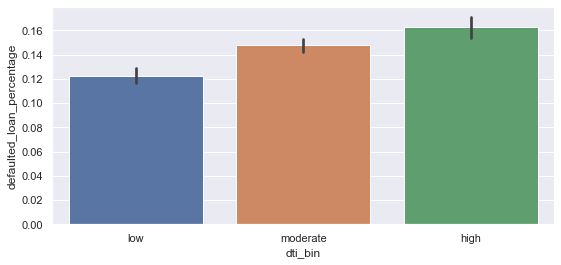

In [925]:
# plotting debt to income ratio
sns.set(rc = {'figure.figsize':(9,4)})
sns.barplot(x='dti_bin', y='loan_status_bin', data=master_lc, order = ['low','moderate','high'])
plt.ylabel('defaulted_loan_percentage')
plt.show()

__Observation 15: Default rate increase as debt to income monthly ratio increases.__

In [926]:
# method to create bin
def binning_annual_inc(x):
    if x <= 50000:
        return 'low'
    elif x > 50000 and x <=100000:
        return 'moderate'
    elif x > 100000 and x <=150000:
        return 'high'
    else:
        return 'very high'
    
master_lc['annual_inc_bin'] = master_lc.annual_inc.apply(lambda x: binning_annual_inc((x)))

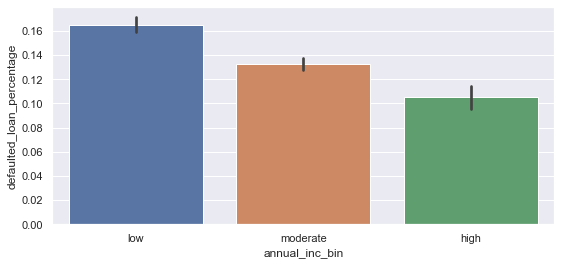

In [927]:
# plotting annual income bin
sns.set(rc = {'figure.figsize':(9,4)})
sns.barplot(x='annual_inc_bin', y='loan_status_bin', data=master_lc)
plt.ylabel('defaulted_loan_percentage')
plt.show()

__Observation 16: Default rate decrease as annual income increases.__

In [928]:
# method to create bin
def binning_installment(x):
    if x <= 250:
        return 'low'
    elif x > 250 and x <=500:
        return 'medium'
    elif x > 500 and x <=750:
        return 'high'
    else:
        return 'very high'
    
master_lc['installment_bin'] = master_lc.installment.apply(lambda x: binning_installment((x)))

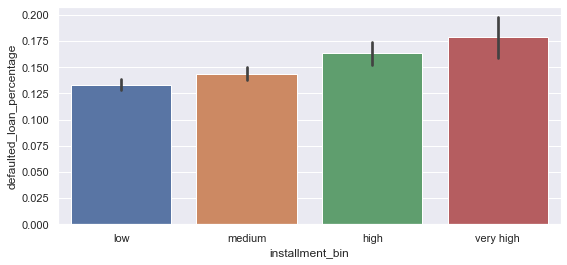

In [929]:
# plotting loan installment bin
sns.set(rc = {'figure.figsize':(9,4)})
sns.barplot(x='installment_bin', y='loan_status_bin', data=master_lc)
plt.ylabel('defaulted_loan_percentage')
plt.show()

__Observation 17: Default rate increase as installment amount increases.__

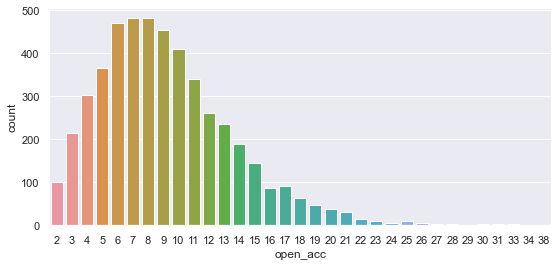

In [930]:
# plotting customers credit profile opened till date
sns.set(rc = {'figure.figsize':(9,4)})
sns.countplot(x='open_acc', data=master_lc[master_lc.loan_status == 'Charged Off'])
plt.show()

__Observation 18: customers with 7-8 open accounts have the highest number of defaulting.__

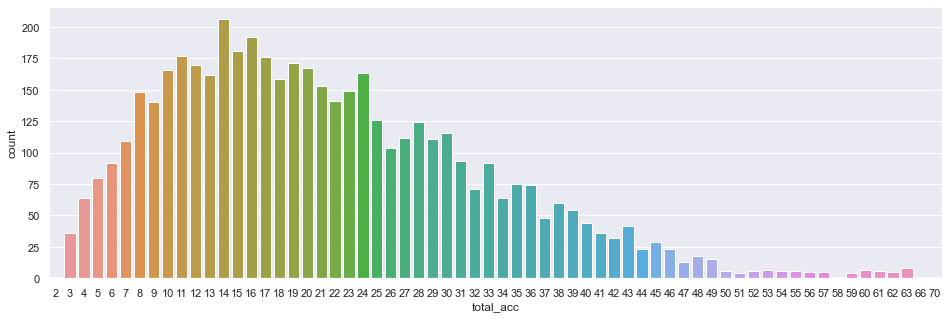

In [931]:
# plotting customers total credit profile 
sns.set(rc = {'figure.figsize':(16,5)})
sns.countplot(x='total_acc', data=master_lc[master_lc.loan_status == 'Charged Off'])
plt.show()

__Observation 19: customers with 15 total accounts have the highest number of defaulting.__

### OBSERVATIONS

From the above univariate analysis we have observed singular behaviour of the various columns / variables based on the loan status of defaulting rate.
> Those analysis tells about the characteristics of those single columns. All the Observations from those analysis are noted under __(Observations 1 - 19)__ with each plot and records.

## Segmented Univariate and Bivariate Analysis

As part of the further analysis we will be performing segmented univariate and bivariate analysis on the columns to get more detailed insights on the records. 

Based on those analysis we will be giving our observations more precisely.

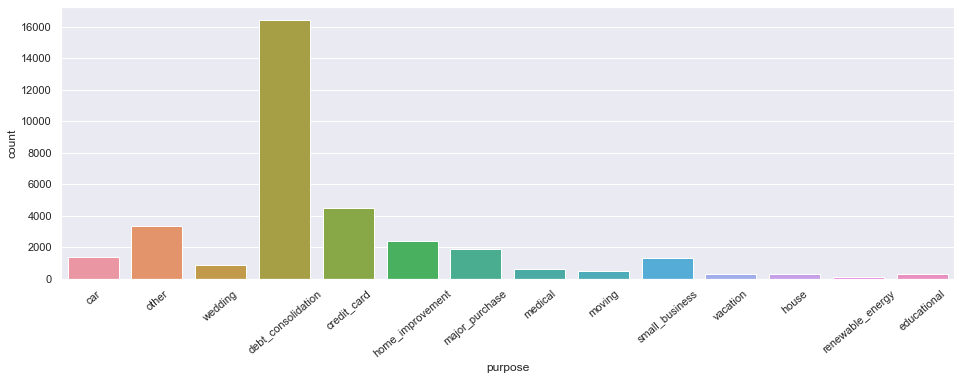

In [932]:
# total counts of the purpose of the loans
sns.set(rc = {'figure.figsize':(16,5)})
sns.countplot(x='purpose', data=master_lc)
plt.xticks(rotation=40)
plt.show()

__debt_consolidation__ is the most common purpose for the loans. So to get more precise understanding of the data we will be segmenting the purpose column based on few most common purpose of the loan application.

In [933]:
# filtering most common purposes
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase","other","small_business"]

segmented_master_lc = master_lc[master_lc.purpose.isin(main_purposes)]
segmented_master_lc.purpose.value_counts()

debt_consolidation    16422
credit_card            4459
other                  3363
home_improvement       2413
major_purchase         1904
small_business         1287
Name: purpose, dtype: int64

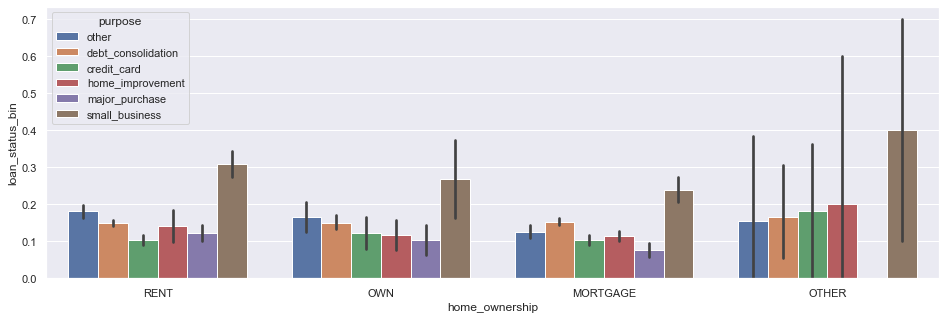

In [934]:
# plotting home ownership against loan default rate segmented by major purposes
sns.set(rc = {'figure.figsize':(16,5)})
sns.barplot(x='home_ownership', data=segmented_master_lc, y='loan_status_bin', hue='purpose')
plt.show()

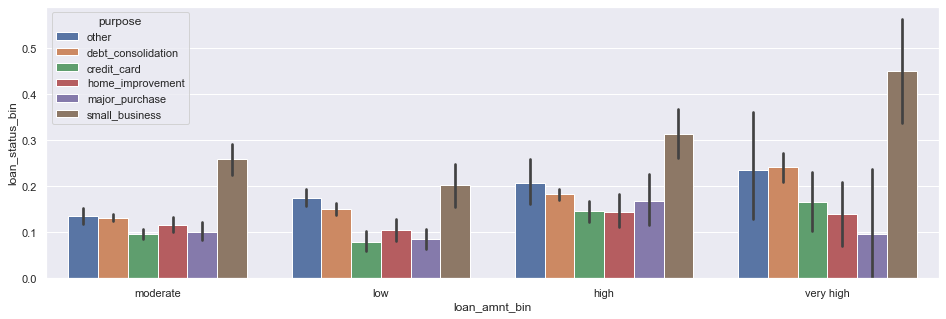

In [935]:
# plotting loan amount bins categories loan default rate segmented by major purposes
sns.set(rc = {'figure.figsize':(16,5)})
sns.barplot(x='loan_amnt_bin', data=segmented_master_lc, y='loan_status_bin', hue='purpose')
plt.show()

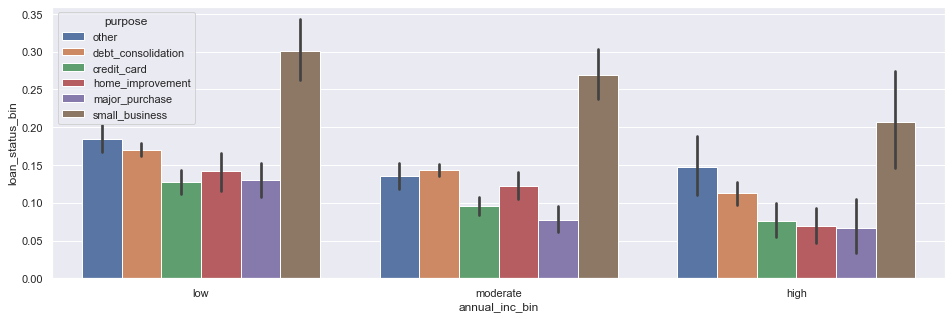

In [936]:
# plotting annual income categories against loan default rate segmented by major purposes
sns.set(rc = {'figure.figsize':(16,5)})
sns.barplot(x='annual_inc_bin', data=segmented_master_lc, y='loan_status_bin', hue='purpose')
plt.show()

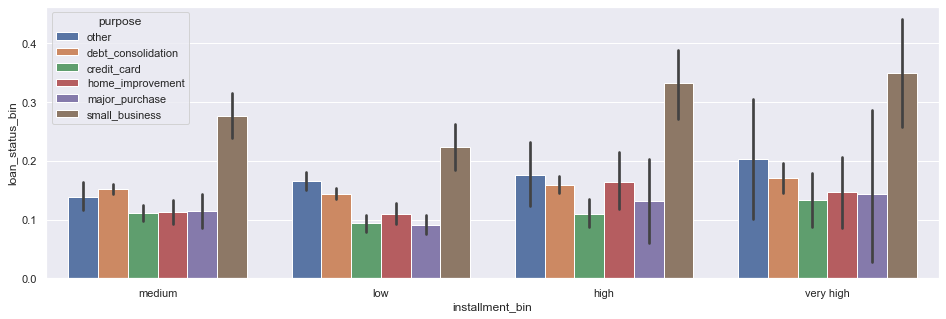

In [937]:
# plotting installment categories against loan default rate segmented by major purposes
sns.set(rc = {'figure.figsize':(16,5)})
sns.barplot(x='installment_bin', data=segmented_master_lc, y='loan_status_bin', hue='purpose')
plt.show()

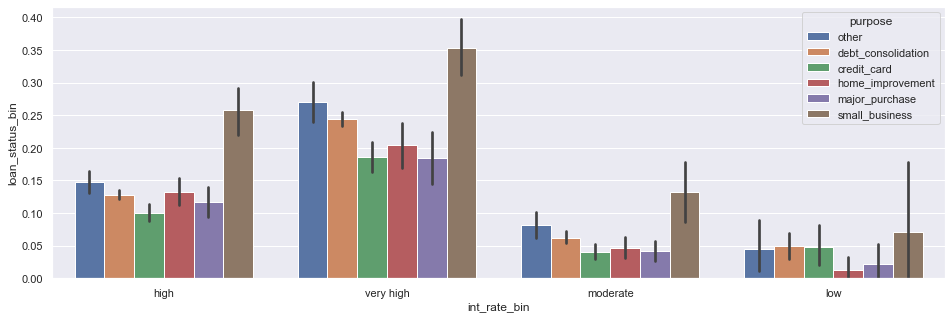

In [938]:
# plotting annual interest rate categories against loan default rate segmented by major purposes
sns.set(rc = {'figure.figsize':(16,5)})
sns.barplot(x='int_rate_bin', data=segmented_master_lc, y='loan_status_bin', hue='purpose')
plt.show()

__Above segmented plots visualizes that:__

1.  Across all __'home ownership','loan amount', 'annual income' and 'installment'__ categories default rate is very high when purpose of the loan is mainly __"Small Business"__

2.  Across __'interest rate'__ categories, __*for very high interest rate default rate is higher for all the purposes and for low interest default rate is lower for all the purposes.*__


Proceeding to the next part of the analysis and plots :

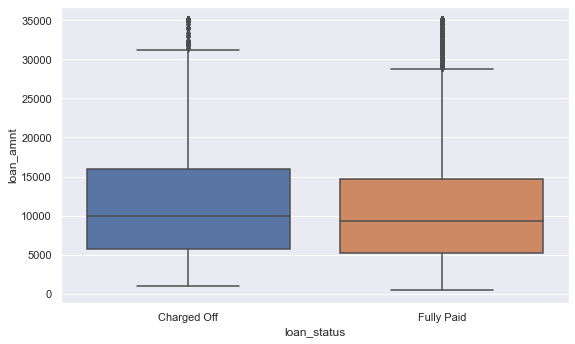

In [939]:
# box plotted loan status with the loan amount
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = master_lc)
plt.show()

__More the loan amount increase there are high chances of getting charged off i.e. being a defaulter.__

__Annual income vs Loan Purpose__

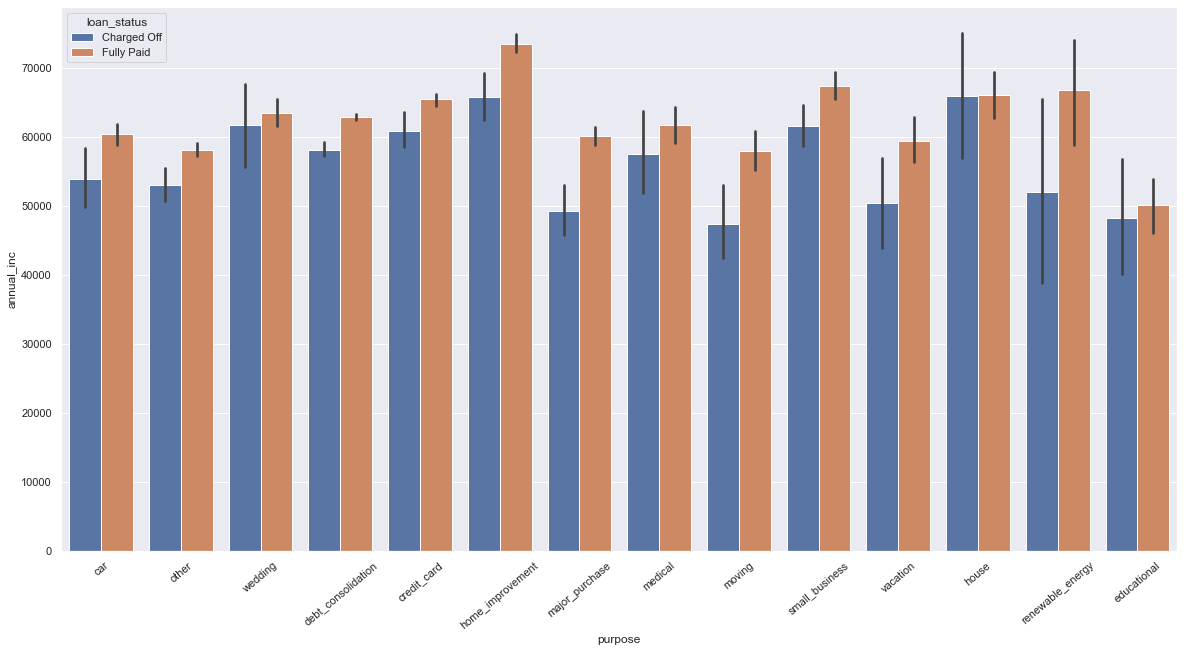

In [940]:
plt.figure(figsize=(20,10))
sns.barplot(data =master_lc,x='purpose', y='annual_inc', hue ='loan_status')
plt.xticks(rotation=40)
plt.show()

__Customers with high income are higher non-defaulter.__

__Loan amount vs Loan purpose__

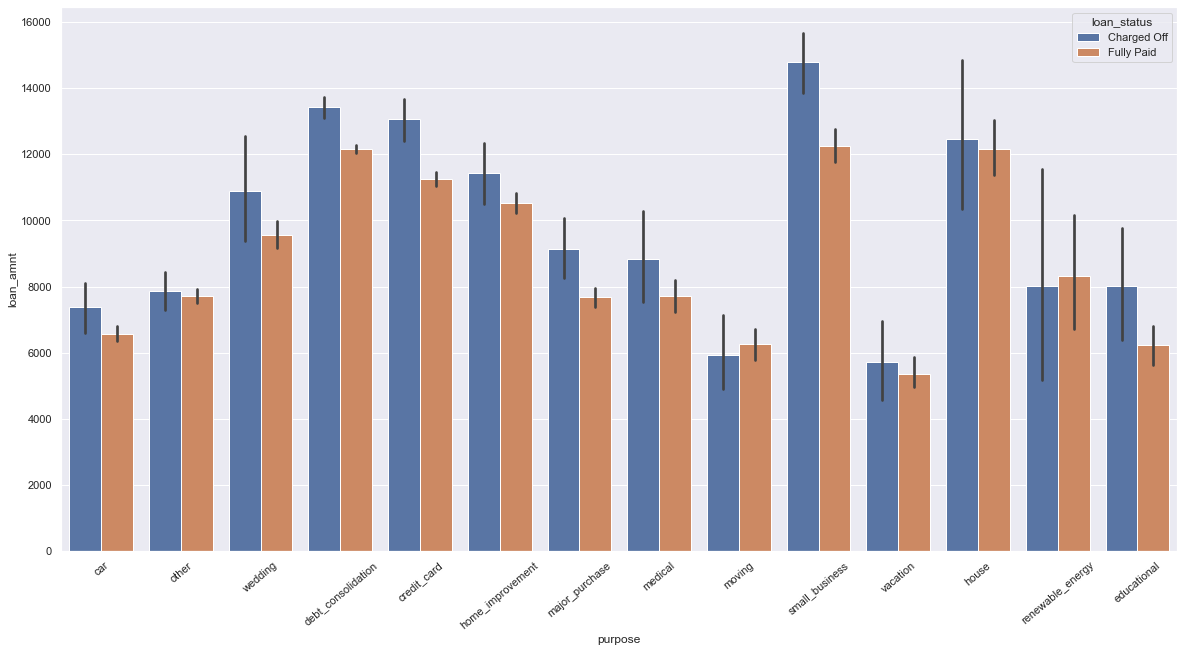

In [941]:
plt.figure(figsize=(20,10))
sns.barplot(data =master_lc,x='purpose', y='loan_amnt', hue ='loan_status')
plt.xticks(rotation=40)
plt.show()

__Invested amount vs Loan purpose__

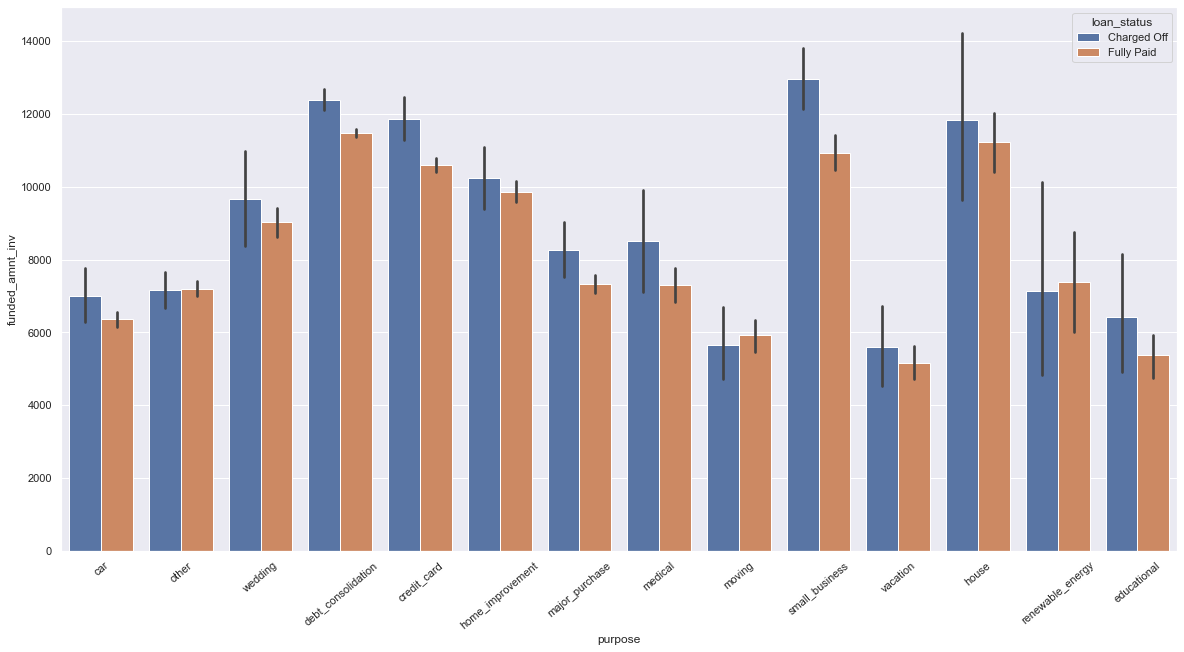

In [942]:
plt.figure(figsize=(20,10))
sns.barplot(data =master_lc,x='purpose', y='funded_amnt_inv', hue ='loan_status')
plt.xticks(rotation=40)
plt.show()

__Annual income vs Home ownership__

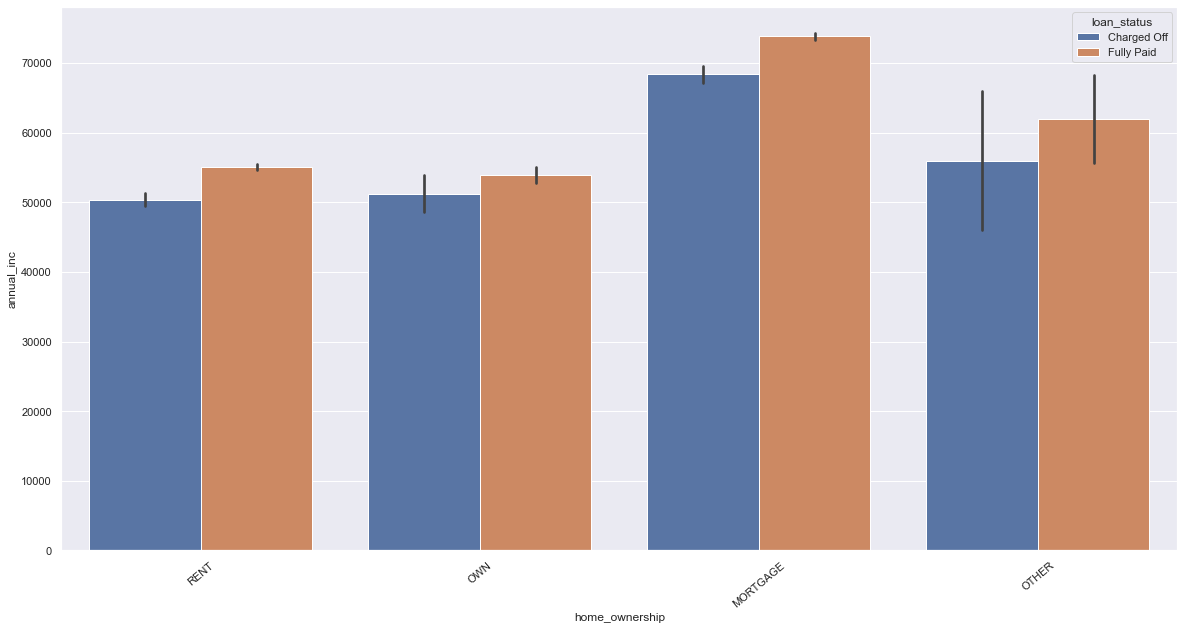

In [943]:
plt.figure(figsize=(20,10))
sns.barplot(data =master_lc,x='home_ownership', y='annual_inc', hue ='loan_status')
plt.xticks(rotation=40)
plt.show()

__People with rented, mortgaged and other home ownership have slightly have less defaulting rate with the increase in annual income.__

In [944]:
# unique values
master_lc.inq_last_6mths.unique()

array([5, 1, 3, 2, 0, 4, 6, 7, 8], dtype=int64)

In [945]:
# binning last 6 months inquiries column
def binning_inq(x):
    if x <3:
        return 'low risk'
    if x>=3 and x < 6:
        return 'moderate risk'
    else:
        return 'high risk'

master_lc.inq_last_6mths = master_lc.inq_last_6mths.apply(lambda x:binning_inq(x))

__Invested amount vs  Inquiries in last 6 months__

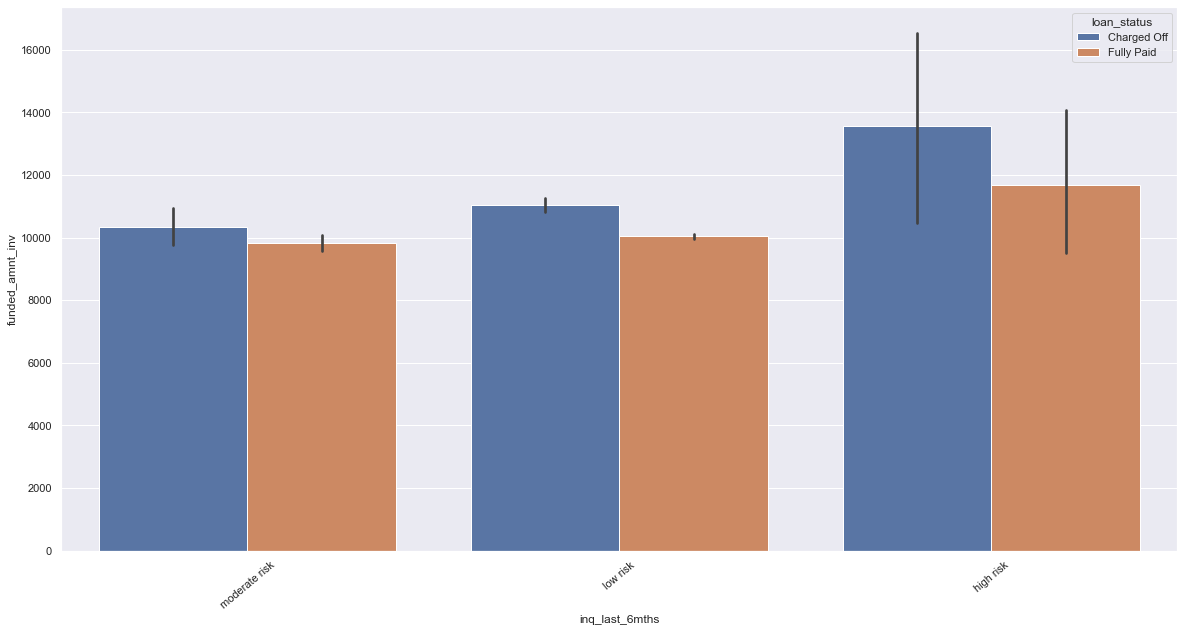

In [946]:
plt.figure(figsize=(20,10))
sns.barplot(data =master_lc,x='inq_last_6mths', y='funded_amnt_inv', hue ='loan_status')
plt.xticks(rotation=40)
plt.show()

__Customers with high risk(i.e. high number of inquiries in last 6 month) for high invested value have more default rate.__

__Interest rate vs Grade__

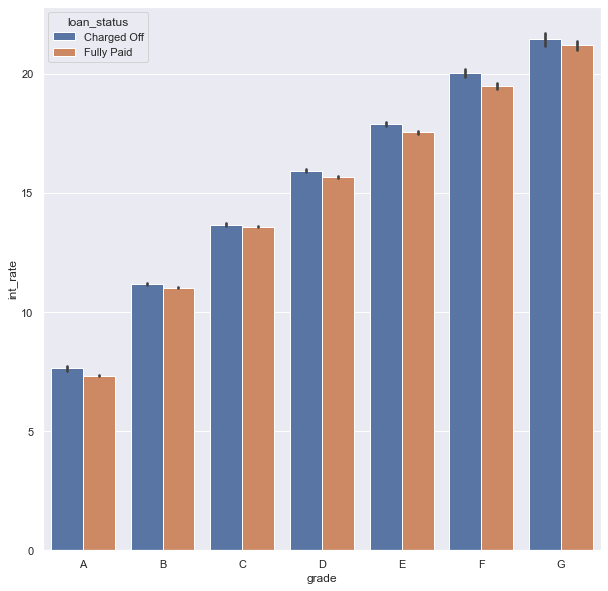

In [947]:
plt.figure(figsize=(10,10))
sns.barplot(data =master_lc,x='grade', y='int_rate', hue ='loan_status', order=['A','B','C','D','E','F','G'])
plt.show()

__Default rate increases as interest rate increases across the GRADE. As loans are graded based on risk factor from low to high (A-G).__

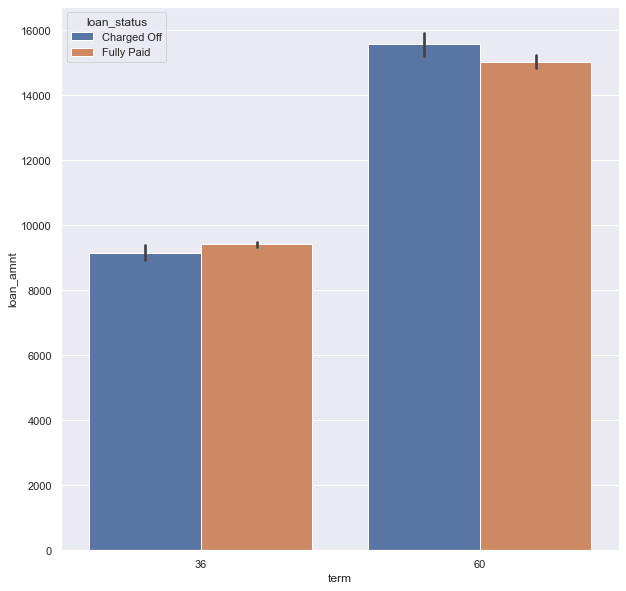

In [948]:
# plot loan amount vs term
plt.figure(figsize=(10,10))
sns.barplot(data =master_lc,x='term', y='loan_amnt', hue ='loan_status')
plt.show()

__Loan amount vs debt-to-income ratio__

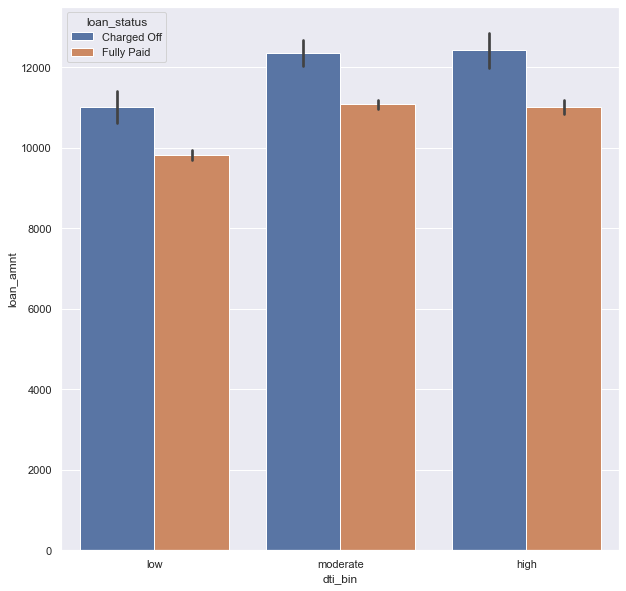

In [949]:
plt.figure(figsize=(10,10))
sns.barplot(data =master_lc,x='dti_bin', y='loan_amnt', hue ='loan_status')
plt.show()

__Loan amount vs States__

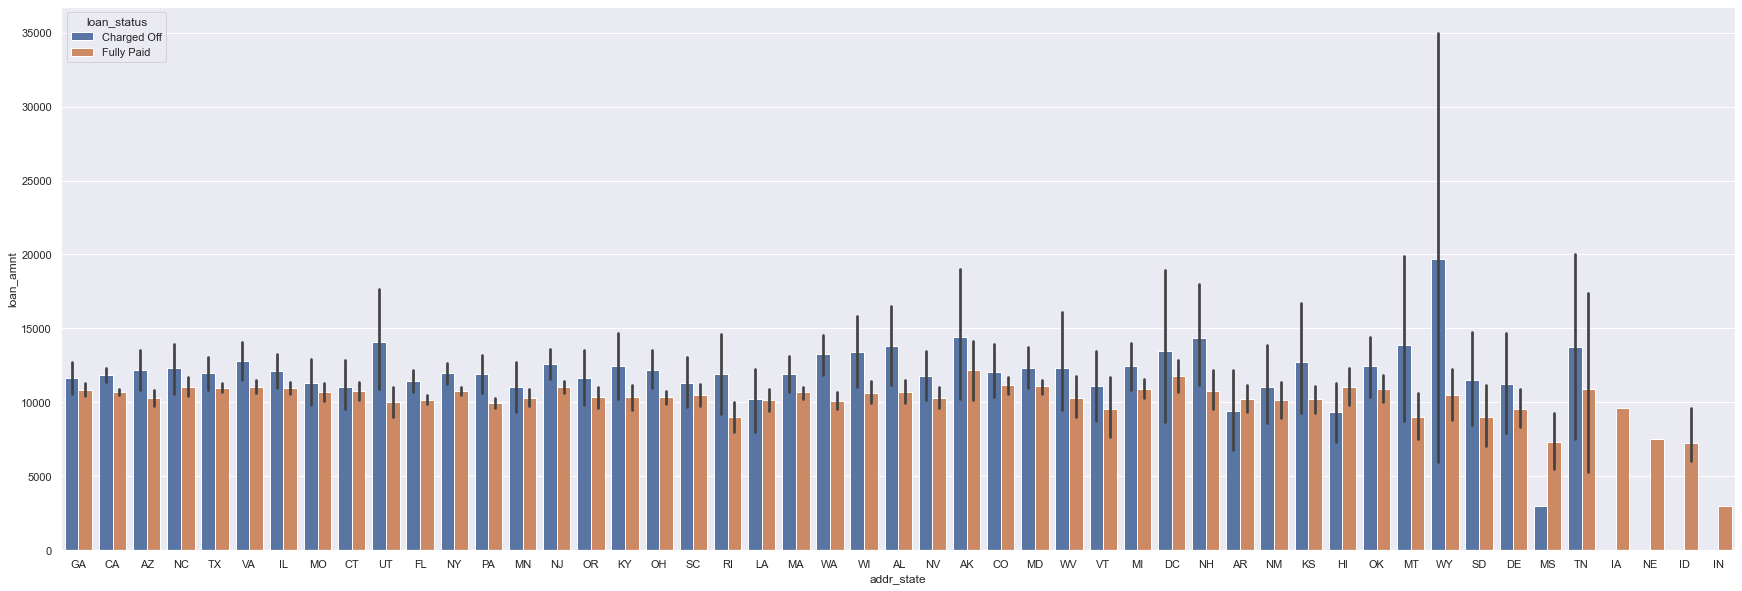

In [950]:
plt.figure(figsize=(30,10))
sns.barplot(data =master_lc,x='addr_state', y='loan_amnt', hue ='loan_status')
plt.show()

__Default rate for the WY state is significantly high with comparison to the other states.__

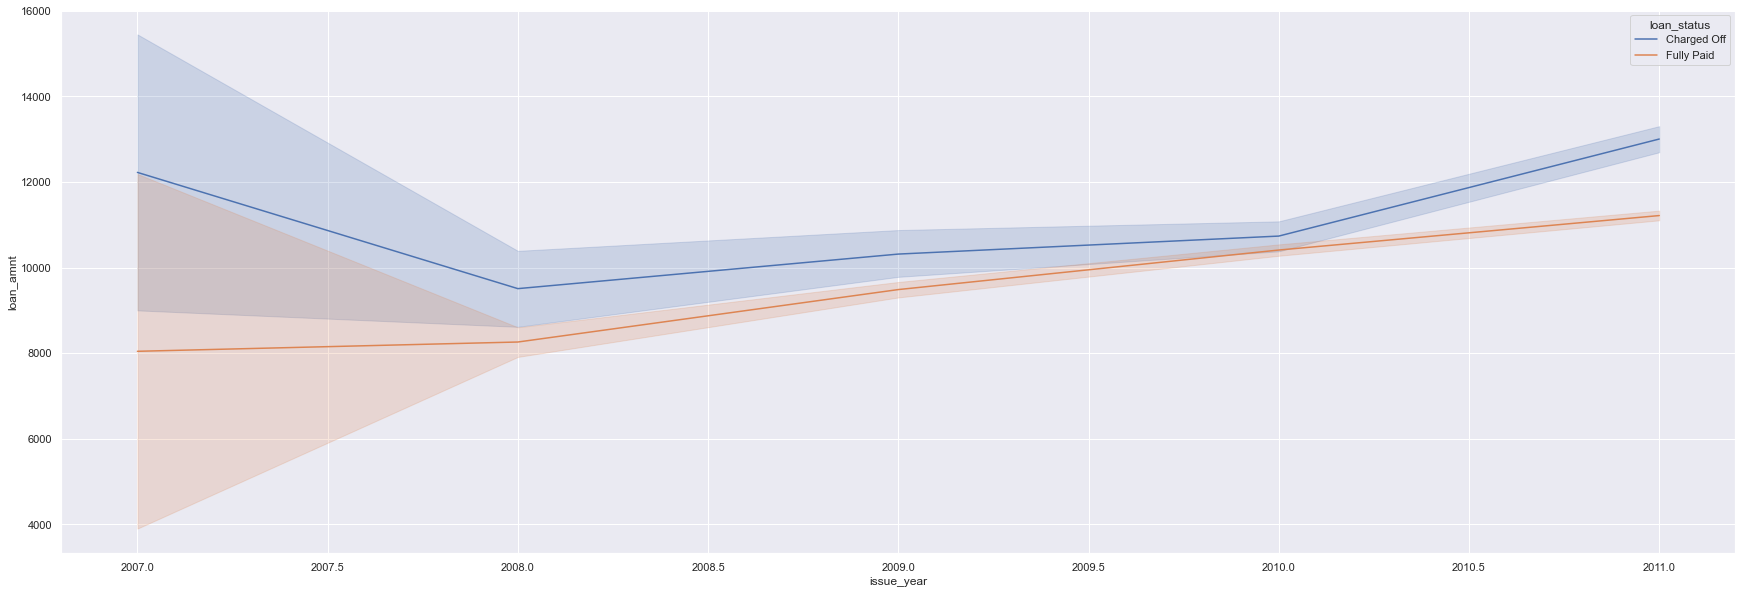

In [951]:
# plot loan amout accross years 
plt.figure(figsize=(30,10))
sns.lineplot(data=master_lc, x='issue_year', y='loan_amnt', hue='loan_status')
plt.show()

__Loan amount vs Interest rate__

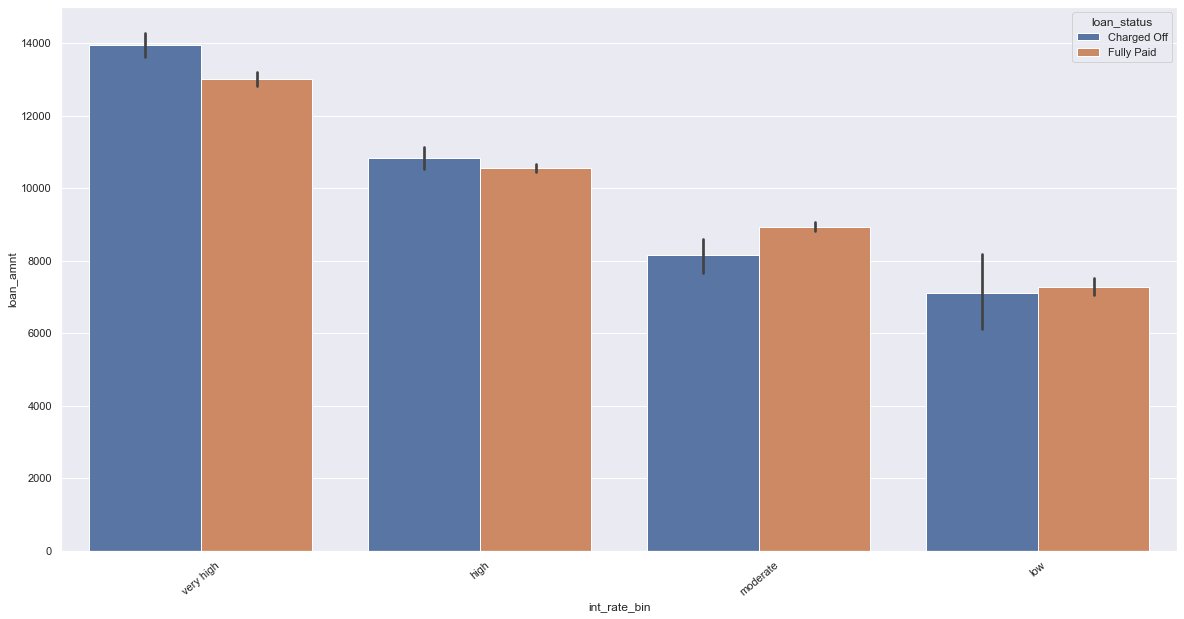

In [952]:
plt.figure(figsize=(20,10))
sns.barplot(data =master_lc,x='int_rate_bin', y='loan_amnt', hue ='loan_status')
plt.xticks(rotation=40)
plt.show()

__Moderate interest rate have comparatively low default rate.__

__Default rate percentage vs Annual income__ (installment)

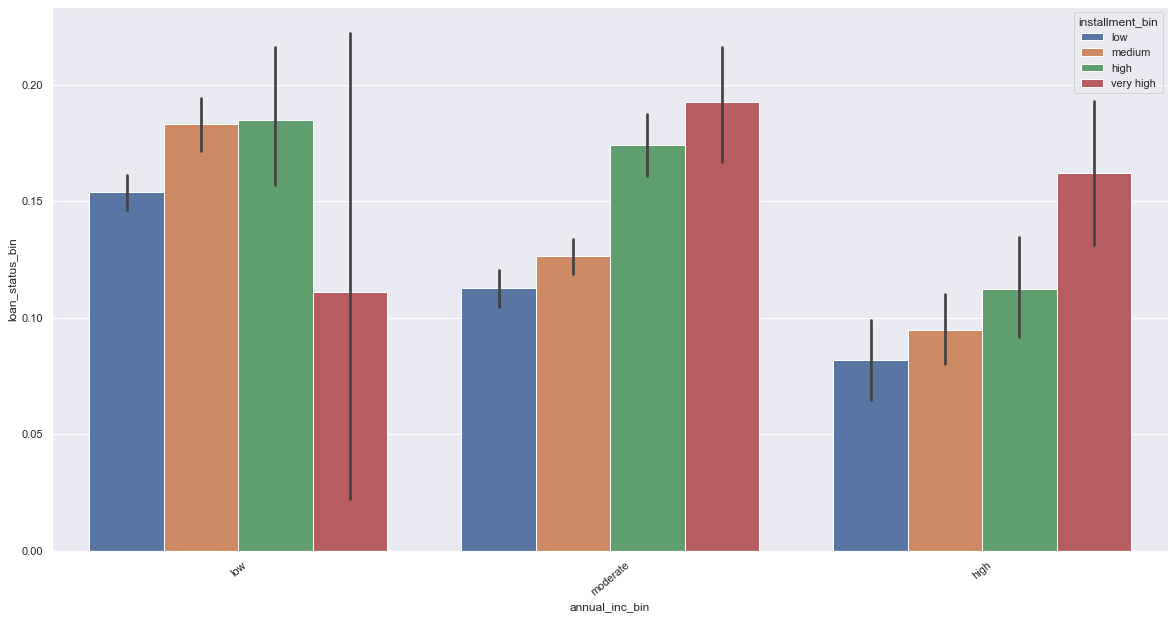

In [953]:
plt.figure(figsize=(20,10))
sns.barplot(data =master_lc,x='annual_inc_bin', y='loan_status_bin', hue ='installment_bin')
plt.xticks(rotation=40)
plt.show()

__Default rate percentage vs Annual income__ (interest rate)

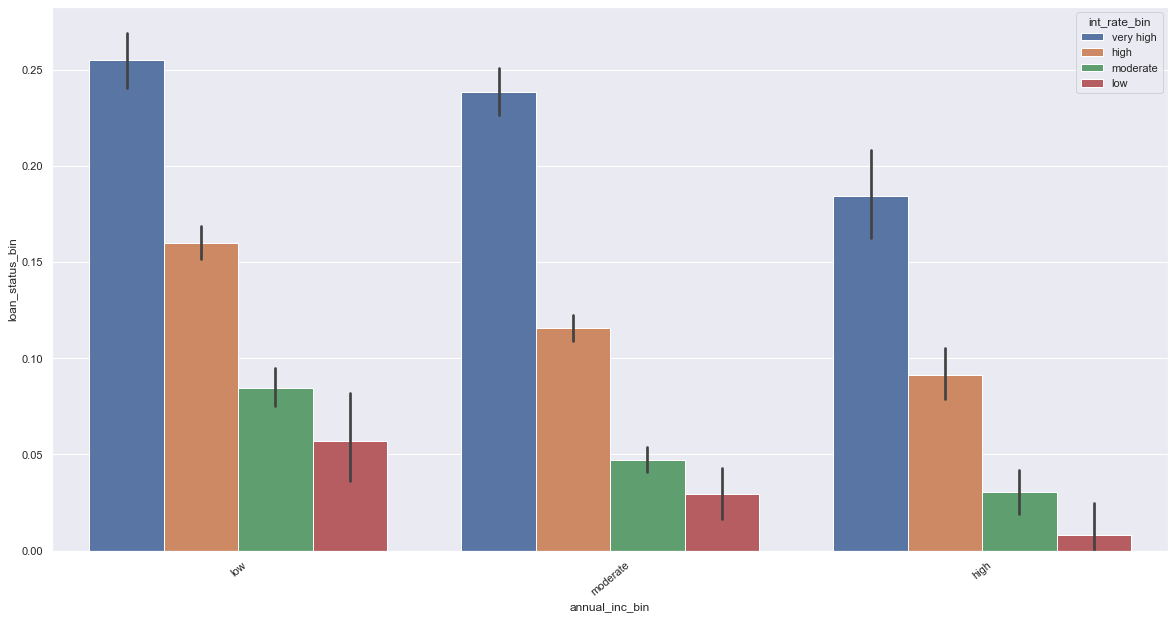

In [954]:
plt.figure(figsize=(20,10))
sns.barplot(data =master_lc,x='annual_inc_bin', y='loan_status_bin', hue ='int_rate_bin')
plt.xticks(rotation=40)
plt.show()

__Default rate percentage vs Loan amount__ 

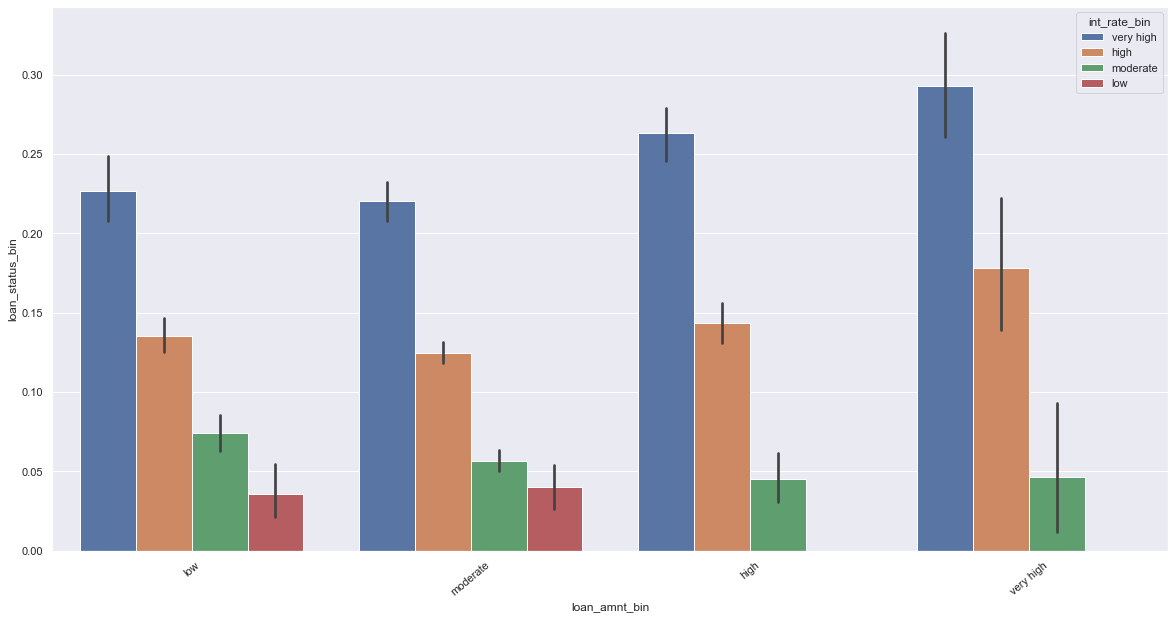

In [955]:
plt.figure(figsize=(20,10))
sns.barplot(data =master_lc,x='loan_amnt_bin', y='loan_status_bin', hue ='int_rate_bin')
plt.xticks(rotation=40)
plt.show()

__Categorical plot of loan amounts across interest rates__

<Figure size 1152x360 with 0 Axes>

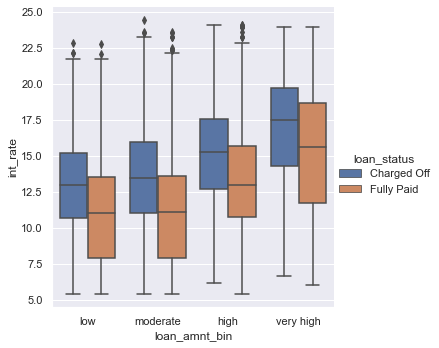

In [956]:
plt.tight_layout()
sns.catplot(data =master_lc,y ='int_rate', x ='loan_amnt_bin', hue ='loan_status',kind = 'box')

__Interest rate, Loan amount is directly proportional to the default rate. The more interest rate and loan amount the chances of charged off is very high.__


In [957]:
correlation = master_lc.corr()

<AxesSubplot:>

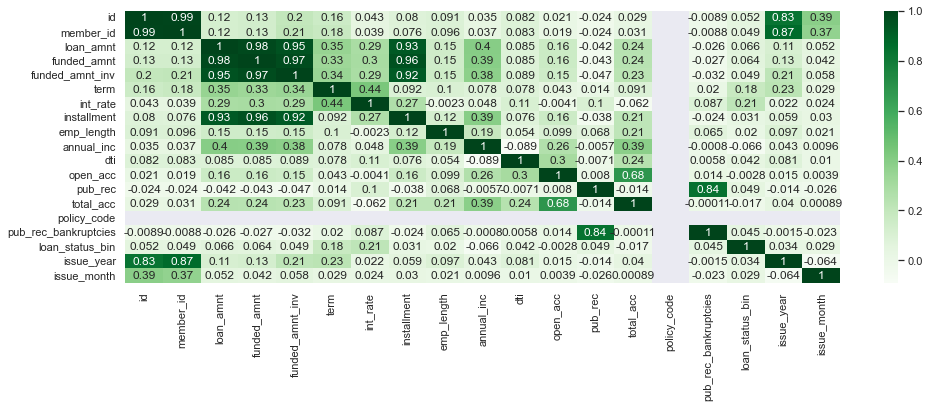

In [958]:
sns.heatmap(correlation,cmap="Greens", annot=True)

__Correlation between all the data plotted in the above plot.__

__Loan amount vs Verification status__

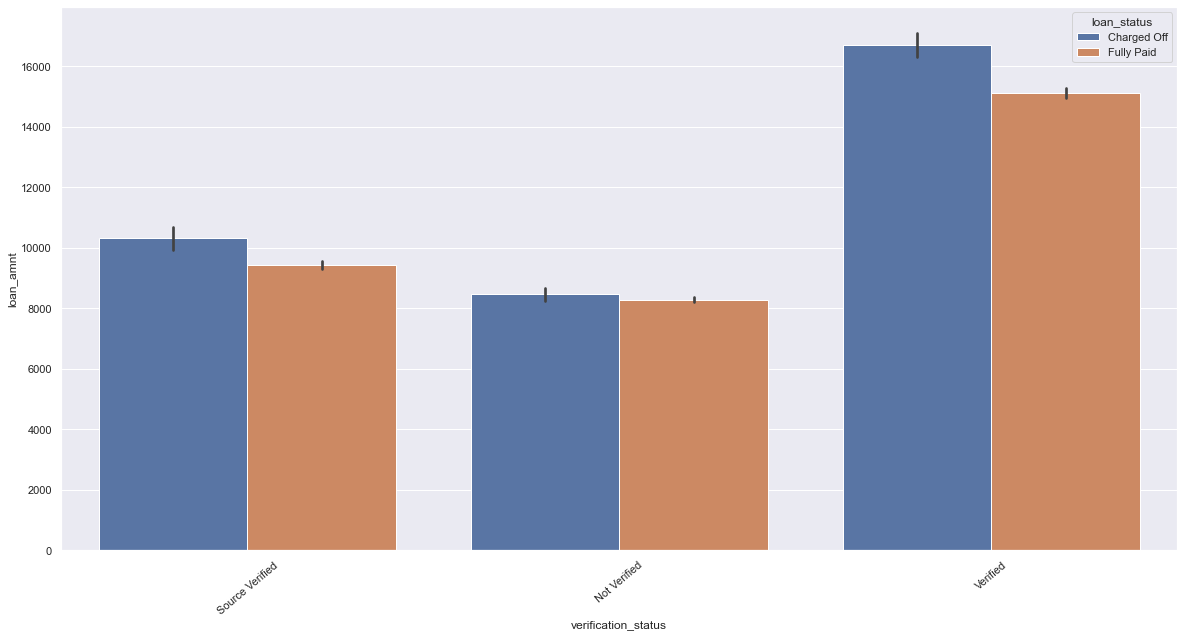

In [959]:
plt.figure(figsize=(20,10))
sns.barplot(data =master_lc,x='verification_status', y='loan_amnt', hue ='loan_status')
plt.xticks(rotation=40)
plt.show()

__Loan amount vs employee categories__

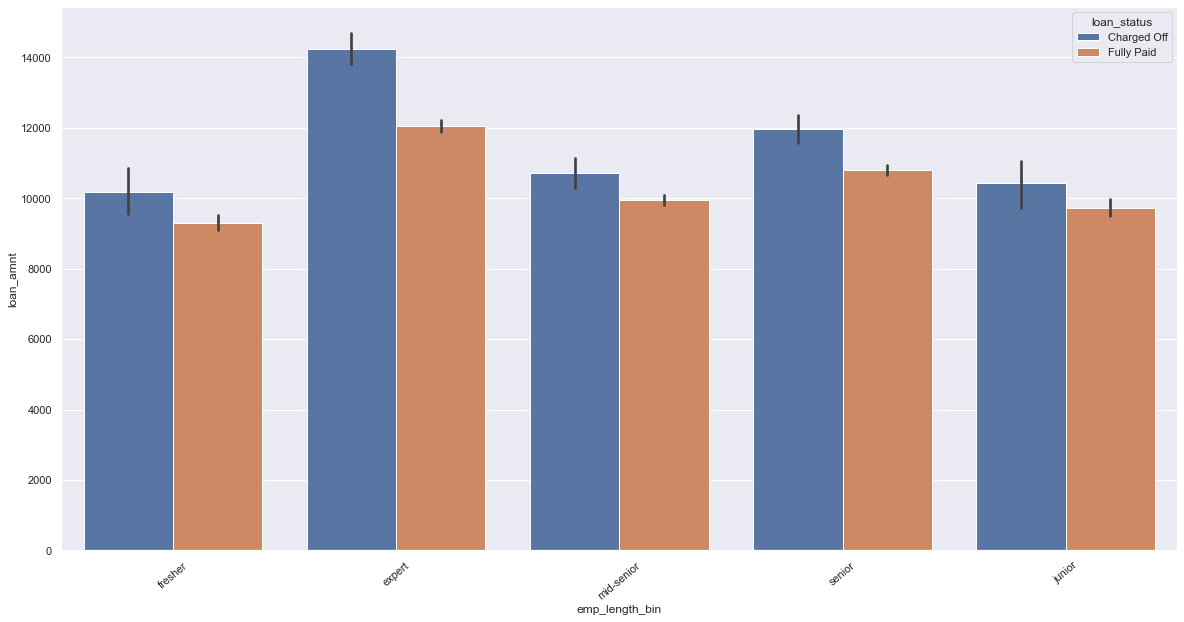

In [960]:
plt.figure(figsize=(20,10))
sns.barplot(data =master_lc,x='emp_length_bin', y='loan_amnt', hue ='loan_status')
plt.xticks(rotation=40)
plt.show()

- Employees with longer work experience got the loan approved for a higher amount. 
- Looking at the verification status data, verified loan applications tend to have higher loan amount.

## Final Observations

__The below conslusions are based on the above analysis based on Fully Paid and Charged Off loans and default rate. Conclusions as follows:__

1.  __Chances of being a Defaulter or getting Charged off is very high when purpose of the loan is for small business.__
<br>
2.  __Chances of being a Defaulter or getting Charged off increase with the interest rate of the loans.higher the interest rate, high chances of being charged off and vice-versa.__
<br>
3.  __Applicants who have taken a loan in the range 14k - 16k and taken loan for 60 months term have high probability of getting defaulted.__
<br>
4.  __Applicants who have taken a loan for small business and the loan amount is greater than 14k have high probability of getting defaulted.__
<br>
5.  __Grade G loans have the highest interest rate above 20 %.__
<br>
6.  __Applicant from the verified sourced and with the loan amount above 16k have high probability of getting defaulted.__
<br>
7.  __Applicants with from than 8 years more employment experience and applied for loan amount above 14k have high probability of getting defaulted .__
<br>
8.  __Applicant with home ownership as MORTGAGED and annual income between rage of 6-7k have high probability of getting defaulted.__


================================ END =======================================